# Research on car sales ads

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day.

You need to study data collected over the last few years and determine which factors influence the price of a vehicle. 

# Step 1. Open the data file and study the general information. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline  

vehicles_us = pd.read_csv('/datasets/vehicles_us.csv')

print('Printed here the database to take a general look to it.')
print()
display(vehicles_us)

Printed here the database to take a general look to it.



,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


In [2]:
print('Here is reported the info method of the Database:')
print()
vehicles_us.info()

Here is reported the info method of the Database:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [3]:
print('Number of rows in the databese is:', vehicles_us.shape[0])
print('Number of columns in the databese is:', vehicles_us.shape[1])
print()
print('Here is reported the describe method of the Database:')
print(vehicles_us.describe())

Number of rows in the databese is: 51525
Number of columns in the databese is: 13

Here is reported the describe method of the Database:
               price    model_year     cylinders       odometer   is_4wd  \
count   51525.000000  47906.000000  46265.000000   43633.000000  25572.0   
mean    12132.464920   2009.750470      6.125235  115553.461738      1.0   
std     10040.803015      6.282065      1.660360   65094.611341      0.0   
min         1.000000   1908.000000      3.000000       0.000000      1.0   
25%      5000.000000   2006.000000      4.000000   70000.000000      1.0   
50%      9000.000000   2011.000000      6.000000  113000.000000      1.0   
75%     16839.000000   2014.000000      8.000000  155000.000000      1.0   
max    375000.000000   2019.000000     12.000000  990000.000000      1.0   

       days_listed  
count  51525.00000  
mean      39.55476  
std       28.20427  
min        0.00000  
25%       19.00000  
50%       33.00000  
75%       53.00000  
max      2

In [4]:
print('Values count for "price" column:')
print()
print(vehicles_us['price'].value_counts(dropna=False)) #dropna=False is an attribute that allow us to show even NaN count, if omitted is True for default.

Values count for "price" column:

1         798
6995      719
5995      655
4995      624
3500      620
         ... 
49988       1
36600       1
300000      1
39873       1
11762       1
Name: price, Length: 3443, dtype: int64


In [5]:
print('Values count for "model_years" column:')
print()
print(vehicles_us['model_year'].value_counts(dropna=False))

Values count for "model_years" column:

NaN       3619
2013.0    3549
2012.0    3468
2014.0    3448
2011.0    3375
          ... 
1954.0       1
1949.0       1
1948.0       1
1936.0       1
1929.0       1
Name: model_year, Length: 69, dtype: int64


In [6]:
print('Values count for "model" column:')
print()
print(vehicles_us['model'].value_counts(dropna=False))

Values count for "model" column:

ford f-150                           2796
chevrolet silverado 1500             2171
ram 1500                             1750
chevrolet silverado                  1271
jeep wrangler                        1119
                                     ... 
ford f-250 super duty                 241
kia sorento                           236
acura tl                              236
nissan murano                         235
mercedes-benz benze sprinter 2500      41
Name: model, Length: 100, dtype: int64


In [7]:
print('Values count for "condition" column:')
print()
print(vehicles_us['condition'].value_counts(dropna=False))

Values count for "condition" column:

excellent    24773
good         20145
like new      4742
fair          1607
new            143
salvage        115
Name: condition, dtype: int64


In [8]:
print('Values count for "cylinders" column:')
print()
print(vehicles_us['cylinders'].value_counts(dropna=False))

Values count for "cylinders" column:

8.0     15844
6.0     15700
4.0     13864
NaN      5260
10.0      549
5.0       272
3.0        34
12.0        2
Name: cylinders, dtype: int64


In [9]:
print('Values count for "fuel" column:')
print()
print(vehicles_us['fuel'].value_counts(dropna=False))

Values count for "fuel" column:

gas         47288
diesel       3714
hybrid        409
other         108
electric        6
Name: fuel, dtype: int64


In [10]:
print('Values count for "odometer" column:')
print()
print(vehicles_us['odometer'].value_counts(dropna=False))

Values count for "odometer" column:

NaN         7892
0.0          185
140000.0     183
120000.0     179
130000.0     178
            ... 
51595.0        1
111381.0       1
155940.0       1
43402.0        1
74063.0        1
Name: odometer, Length: 17763, dtype: int64


In [11]:
print('Values count for "transmission" column:')
print()
print(vehicles_us['transmission'].value_counts(dropna=False))

Values count for "transmission" column:

automatic    46902
manual        2829
other         1794
Name: transmission, dtype: int64


In [12]:
print('Values count for "type" column:')
print()
print(vehicles_us['type'].value_counts(dropna=False))

Values count for "type" column:

SUV            12405
truck          12353
sedan          12154
pickup          6988
coupe           2303
wagon           1541
mini-van        1161
hatchback       1047
van              633
convertible      446
other            256
offroad          214
bus               24
Name: type, dtype: int64


In [13]:
print('Values count for "paint_color" column:')
print()
print(vehicles_us['paint_color'].value_counts(dropna=False))

Values count for "paint_color" column:

white     10029
NaN        9267
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64


In [14]:
print('Values count for "is_4wd" column:')
print()
print(vehicles_us['is_4wd'].value_counts(dropna=False))

Values count for "is_4wd" column:

NaN    25953
1.0    25572
Name: is_4wd, dtype: int64


In [15]:
print('Values count for "date_posted" column:')
print()
print(vehicles_us['date_posted'].value_counts(dropna=False))

Values count for "date_posted" column:

2019-03-17    186
2019-01-05    184
2018-09-20    178
2019-03-11    176
2018-10-09    174
             ... 
2018-06-18    119
2018-07-04    118
2018-06-08    117
2019-01-11    117
2019-01-04    116
Name: date_posted, Length: 354, dtype: int64


In [16]:
print('Values count for "days_listed" column:')
print()
print(vehicles_us['days_listed'].value_counts(dropna=False))

Values count for "days_listed" column:

18     959
24     950
22     945
19     941
20     934
      ... 
263      1
182      1
261      1
217      1
223      1
Name: days_listed, Length: 227, dtype: int64


In [17]:
print('The means for the Database quantitative columns are:')
print(vehicles_us.mean())  

The means for the Database quantitative columns are:
price           12132.464920
model_year       2009.750470
cylinders           6.125235
odometer       115553.461738
is_4wd              1.000000
days_listed        39.554760
dtype: float64


In [18]:
print('The medians for the Database quantative columns are:')
print(vehicles_us.median()) 

The medians for the Database quantative columns are:
price            9000.0
model_year       2011.0
cylinders           6.0
odometer       113000.0
is_4wd              1.0
days_listed        33.0
dtype: float64


In [19]:
print('The number of duplicates in the dataframe is:', vehicles_us.duplicated().sum())


The number of duplicates in the dataframe is: 0


In [20]:
print('The database is representing the posted "Crankshaft List" advertisements.')
print('After a carefully esamination of the data available we indentified 51525 entries')
print('Divided in 13 columns (4 float64), (2int64), (7object)')
print('5 columns present missing values, those are: model_year, cylinders, odometer, paint_color', 'is_4wd')

The database is representing the posted "Crankshaft List" advertisements.
After a carefully esamination of the data available we indentified 51525 entries
Divided in 13 columns (4 float64), (2int64), (7object)
5 columns present missing values, those are: model_year, cylinders, odometer, paint_color is_4wd


### Conclusions
Consideration on .info() method:
-	The DataFrame has 51525 values divided by 13 columns. (4 float, 2 int, 7 string)
-	['model_years'] type must be changed in int64.
-	[‘model_years’, ‘cylinders’, 'odorometer', 'paint_color', 'is_4ws'] have missing values. (3619, 5260, 7892, 9267, 25.953)

Consideration on the print() method:
-	['is_4wd] there are only 25.572 values of 1.0 and no 0 values this mean we should fill NaN values with zeros. 
-   ['paint_color'] presenting 9267 NaN. Those are going to be filled  with "other"
-	for ['model_years'] and ['cylinders'] probably going to fill values in relation with the lenght of count_values method.

Consideration on the values_counts () method:
-	[‘price’] column presents 3443 results. The kind of column should become float64 instead int64.
    1 is probably a technical issue. We should replace all the 1 with a mean() since the difference btw 12132(mean) and 10040       (median) is not that substantial.

-	[‘model_year'] 68 diffent values. The min values is 1908 (the first cars accessible to the masses was exactly in the 1908)     and the max values corrispond to 2019, then probably all them are true values. while the type of column has to be changed       in int32 but could even become an int16 (since years cannot contain values over 32767).

-	[‘model’] has 100 different voices with NO missing values: 
    should be possible here rename them and grouping them for constructors. 

-	[‘condition’] resulted in 6 different voices: this is already a grouped column but should be converted from string to           numeric values.

-	['cylinders'] goes btw 3.0 and 12.0 with a count of 7 values
                                                                                                            
 -	[‘fuel’] is composed by:                                     ‘gas’                   47288			
                                                                 ‘diesel’                 3714        
                                                                 'hybrid'                  409		
                                                                 'other'                   108			
                                                                 'electric'                  6
                                                                 
                                                           gas rapresent 91,7768% of the total shares.

-	[‘odometer’] 17762 values count, lot of them equal to zero. this column present 7892 missing values gonna replace them         probably using the median since few really high values bring the mean or too high values (but let's check this out).

-	[‘transmission’] is composed by 'automatic', 'manual' and 'other', where 'automatic' rapresent the 91,027% of the 'pie'.

-	[‘type’] describing the car type counts 13 different values.

-   ['paint_color'] 12  string values, 9267 don't actually know how to procede with them, let's investigate. 

-	[‘is_4wd’] resulted in 25572 values as '1', all the others are '0'.

-	[‘date_posted’] Length: 354, this should definitely become a date_format.

-	[‘days_listed’] has 227 different values, min is 0 and max 271, values with 0 should be checked, since is not possible to       be listed for 0 days


I added the mean values of all numerical columns and the .describe() method wich gaves us even a clearer prospect of the numerical columns starting situation.

FOUND randomic and non-randomic missing values:

['is_4wd'] the missing values in this column are not random since they all 0 (this is probably a technical issue since all the missing values corrisponds to zero.

['paint_color'] and ['model_year'] and ['cylinders'] missing random values. here is not possible to highlight the reasons for those missing values. those are probably human mistakes or values that were not explicit in the ad. 


- duplicates number count equal to zero.

# Step 2. Data preprocessing

In [21]:
#REPLACING MISSING AND WRONG VALUES.
#Identifying all the missing values for the Dataset.
print('Count of missing values inside the entire dataset by columns:')
print('')
print(vehicles_us.isnull().sum())

Count of missing values inside the entire dataset by columns:

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64


In [22]:
#Working on 'price' missing values. (798 value with '1' going to replace them with mean.)
price_avg = vehicles_us['price'].mean()
vehicles_us.loc[vehicles_us['price'] == 1, 'price'] = price_avg
print('New "price" column values count after replacing missing values is:')
print('')
print(vehicles_us['price'].value_counts())

New "price" column values count after replacing missing values is:

12132.46492    798
6995.00000     719
5995.00000     655
4995.00000     624
3500.00000     620
              ... 
39010.00000      1
4877.00000       1
18315.00000      1
5993.00000       1
15865.00000      1
Name: price, Length: 3443, dtype: int64


In [23]:
#Working on 'cylinders' missing values. (mean is 6.1252, median is 6 since the column should be integers I am going to choose median.)
cylinders_median = vehicles_us['cylinders'].median()
vehicles_us['cylinders'] = vehicles_us['cylinders'].fillna(cylinders_median)
print('New "cylinders" column after replacing missing values is:')
print('')
print(vehicles_us['cylinders'].value_counts())

New "cylinders" column after replacing missing values is:

6.0     20960
8.0     15844
4.0     13864
10.0      549
5.0       272
3.0        34
12.0        2
Name: cylinders, dtype: int64


In [24]:
#Working on 'paint_color' missing values.
vehicles_us['paint_color'] = vehicles_us['paint_color'].fillna(value="not_specified")
print('New "paint_color" column after replacing missing values is:')
print('')
print(vehicles_us['paint_color'].value_counts())

New "paint_color" column after replacing missing values is:

white            10029
not_specified     9267
black             7692
silver            6244
grey              5037
blue              4475
red               4421
green             1396
brown             1223
custom            1153
yellow             255
orange             231
purple             102
Name: paint_color, dtype: int64


In [25]:
#Working on 'is_4wd' missing values.
vehicles_us['is_4wd'] = vehicles_us['is_4wd'].fillna(value=0)
print('New "is_4wd" column after replacing missing values is:')
print('')
print(vehicles_us['is_4wd'].value_counts())

New "is_4wd" column after replacing missing values is:

0.0    25953
1.0    25572
Name: is_4wd, dtype: int64


In [26]:
#Working on 'model_years' missing values. I decided here to work with dictionaries
print('Grouping model per model_year to find correlations between the model and the year.')
print('')
model_grouped_year = vehicles_us.groupby('model')['model_year'].agg(lambda x: x.value_counts().index[0])
print(model_grouped_year)
models_keys = list(model_grouped_year.index)
year_values = list(model_grouped_year) 
dictionary_model = {models_keys[i]: year_values[i] for i in range(len(models_keys))}
print('')
print('')
print('The dictionary I created with model and model_year look like this:')
print(dictionary_model)
for i, val in vehicles_us['model'].iteritems():
    vehicles_us.loc[i,'model_year'] = dictionary_model[val]
print('')
print('')
print('New "model_year" column after replacing missing values is:')
print(vehicles_us['model_year'].value_counts())
print(vehicles_us['model_year'].value_counts().sum())

Grouping model per model_year to find correlations between the model and the year.

model
acura tl             2005.0
bmw x5               2012.0
buick enclave        2012.0
cadillac escalade    2007.0
chevrolet camaro     2014.0
                      ...  
toyota sienna        2004.0
toyota tacoma        2015.0
toyota tundra        2007.0
volkswagen jetta     2012.0
volkswagen passat    2013.0
Name: model_year, Length: 100, dtype: float64


The dictionary I created with model and model_year look like this:
{'acura tl': 2005.0, 'bmw x5': 2012.0, 'buick enclave': 2012.0, 'cadillac escalade': 2007.0, 'chevrolet camaro': 2014.0, 'chevrolet camaro lt coupe 2d': 2017.0, 'chevrolet colorado': 2016.0, 'chevrolet corvette': 2006.0, 'chevrolet cruze': 2014.0, 'chevrolet equinox': 2013.0, 'chevrolet impala': 2008.0, 'chevrolet malibu': 2013.0, 'chevrolet silverado': 2008.0, 'chevrolet silverado 1500': 2014.0, 'chevrolet silverado 1500 crew': 2018.0, 'chevrolet silverado 2500hd': 2006.0, 'chevrol

In [27]:
#Working on 'odometer' missing values. 
vehicles_us['odometer'] = vehicles_us['odometer'].fillna(vehicles_us.groupby('model_year')['odometer'].transform('median')) #groupby model year since older cars can have an higher median then new ones.
print('New "odometer" column value counts after replacing missing values is:')
print('')
print(vehicles_us['odometer'].value_counts())

New "odometer" column value counts after replacing missing values is:

114000.0    1268
101649.0     990
105464.0     961
110000.0     864
133000.0     810
            ... 
94999.0        1
51595.0        1
111381.0       1
155940.0       1
51153.0        1
Name: odometer, Length: 17764, dtype: int64


In [28]:
#CHANGING DATA TYPE
print('The types for the dataframe are:')
print(vehicles_us.dtypes)
print('The columns to be changed in int are: model_year, cylinders, is_4wd')
print('')
print('Columns to change to float values: None.')
print('')
print('[date_posted] column must be changed in date type.')

The types for the dataframe are:
price           float64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd          float64
date_posted      object
days_listed       int64
dtype: object
The columns to be changed in int are: model_year, cylinders, is_4wd

Columns to change to float values: None.

[date_posted] column must be changed in date type.


In [29]:
#Changing types to int.
vehicles_us['model_year'] = vehicles_us['model_year'].astype('int16')
vehicles_us['cylinders'] = vehicles_us['cylinders'].astype('int16')
vehicles_us['is_4wd'] = vehicles_us['is_4wd'].astype('int16')

In [30]:
#Working on date_posted column.
vehicles_us['date_posted'] = pd.to_datetime(vehicles_us['date_posted'], format='%Y-%m-%d')
print('New "date_posted" column values count is:')
print('')
print(vehicles_us['date_posted'].value_counts())

New "date_posted" column values count is:

2019-03-17    186
2019-01-05    184
2018-09-20    178
2019-03-11    176
2018-10-09    174
             ... 
2018-06-18    119
2018-07-04    118
2019-01-11    117
2018-06-08    117
2019-01-04    116
Name: date_posted, Length: 354, dtype: int64


In [31]:
print('The new Dataframe with changed data types is:')
vehicles_us.info()

The new Dataframe with changed data types is:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null float64
model_year      51525 non-null int16
model           51525 non-null object
condition       51525 non-null object
cylinders       51525 non-null int16
fuel            51525 non-null object
odometer        51525 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     51525 non-null object
is_4wd          51525 non-null int16
date_posted     51525 non-null datetime64[ns]
days_listed     51525 non-null int64
dtypes: datetime64[ns](1), float64(2), int16(3), int64(1), object(6)
memory usage: 4.2+ MB


### Conclusions

REPLACING VALUES:
- in ['price'] replaced all the '1' with the mean of the price.
- in ['cylinders'] replaced all the NaN values with the median value.
- in ['model_year'] I used dictionaries to determine values to replace.
- in ['paint_color'] was choosen "not-specified" as filler method.
- I decided to replace ['odometer'] null values with the median of odometers values grouped by ['model_year'], since older cars   can have an higher median then new ones. I choose median instead of mean since it doesn't take on consideration too high         values.
- replaced all the NaN in ['is_4wd'] with 0.

CHANGING DATA TYPES:
- Changed ['model_year'] column to int16, I choose int16 cause values are btw 0 and 2021.
- Changed ['cylinders'] column to int16, I choose int16 cause values goes from 0 to 12.
- Changed ['is_4wd'] colomn to int16, can only contain values of 0 and 1.
- Changed ['date_posted'] type to date_time type since it's a date value.

# Step 3. Make calculations and add them to the table

In [32]:
#Working on 'condition' column.
vehicles_us['condition'] = vehicles_us['condition'].map({'new':5, "like new":4, 'excellent':3, 'good':2, 'fair':1, 'salvage':0})
#choosed .map() wich returns me the same result as the previous five replace methods but written in just one line.
vehicles_us['condition'] = vehicles_us['condition'].astype('int16') #changing datatype to int16.

print('New "condition" column:')
print('')
print(vehicles_us['condition'].value_counts())

New "condition" column:

3    24773
2    20145
4     4742
1     1607
5      143
0      115
Name: condition, dtype: int64


In [33]:
#Adding weekdays to the dataframe.
vehicles_us['weekday'] = vehicles_us['date_posted'].dt.weekday #obtaining the day of the week from date_posted 0 corrisponds to Mondays till 6 Sundays
print('The new "weekday" column was added to the Dataframe:')
print('')
print(vehicles_us['weekday'].value_counts())
print('')
print('')
print('Total voices in weekday column are:', vehicles_us['weekday'].value_counts().sum())

The new "weekday" column was added to the Dataframe:

3    7510
5    7392
6    7356
0    7339
4    7334
2    7299
1    7295
Name: weekday, dtype: int64


Total voices in weekday column are: 51525


In [34]:
#Adding months to the dataframe.
vehicles_us['month'] = vehicles_us['date_posted'].dt.month
print('The new "month" column was added to the Dataframe:')
print('')
print(vehicles_us['month'].value_counts())
print('')
print('')
print('Total voices in month column are:', vehicles_us['month'].value_counts().sum())

The new "month" column was added to the Dataframe:

10    4643
12    4564
3     4559
5     4503
8     4480
7     4471
9     4452
1     4452
11    4354
6     4216
2     4014
4     2817
Name: month, dtype: int64


Total voices in month column are: 51525


In [35]:
#Adding year to the dataframe.
vehicles_us['year'] = vehicles_us['date_posted'].dt.year
print('The new "year" column was added to the Dataframe:')
print('')
print(vehicles_us['year'].value_counts())
print('')
print('')
print('Total voices in year column are:', vehicles_us['year'].value_counts().sum())

The new "year" column was added to the Dataframe:

2018    35683
2019    15842
Name: year, dtype: int64


Total voices in year column are: 51525


In [36]:
#Adding age to the dataframe.
vehicles_us['age'] = vehicles_us['year'] - vehicles_us['model_year'] #obtaining age
print('Age describe method:')
print(vehicles_us['age'].describe()) #going to look for min and max values in age column to check if they are possible.
vehicles_us['age'] = vehicles_us['age'].astype('int16') #changing datatype to int16.

Age describe method:
count    51525.000000
mean         6.786181
std          3.523578
min          0.000000
25%          4.000000
50%          6.000000
75%         10.000000
max         16.000000
Name: age, dtype: float64


In [37]:
print('Total voices in age column are:')
print(vehicles_us['age'].value_counts())

Total voices in age column are:
5     7288
4     6336
6     5782
3     5040
11    4858
7     4112
10    3915
12    3311
8     2314
2     2226
9     1558
13    1490
1     1331
14     703
0      642
15     475
16     144
Name: age, dtype: int64


In [38]:
#Adding average mileage per year
vehicles_us['mileage'] = vehicles_us['odometer'] / vehicles_us['age']
print('The new mileage column is:')
print(vehicles_us['mileage'])
print('Checking mileage column to find infinite values:')
print(vehicles_us.query('mileage == inf'))
print('It resulted in 640 rows.')
vehicles_us['mileage'] = vehicles_us['mileage'].replace([np.inf], np.nan)

The new mileage column is:
0        24166.666667
1        17741.000000
2        13750.000000
3        19000.000000
4        20225.750000
             ...     
51520    22034.000000
51521    30250.000000
51522    18285.714286
51523    17446.625000
51524    35154.666667
Name: mileage, Length: 51525, dtype: float64
Checking mileage column to find infinite values:
         price  model_year                          model  condition  \
71     23300.0        2018    nissan frontier crew cab sv          2   
80     26900.0        2018  chevrolet silverado 1500 crew          2   
101    18700.0        2018    nissan frontier crew cab sv          2   
113    24600.0        2018  chevrolet silverado 1500 crew          2   
114    23700.0        2018    nissan frontier crew cab sv          2   
...        ...         ...                            ...        ...   
50738  21900.0        2018    nissan frontier crew cab sv          2   
50933   5500.0        2018                nissan frontier    

In [39]:
print('Count of NaN is:')
print(vehicles_us['mileage'].isnull().sum())#checking if the infinite values where all replaced by NaN values.

Count of NaN is:
642


In [40]:
vehicles_us['mileage'] = vehicles_us['mileage'].fillna(value= 99999999999999)
#assigning to all NaN a value that corrisponds to odometer kilometers
vehicles_us['mileage'] = vehicles_us['mileage'].where(vehicles_us['mileage'] != 99999999999999, vehicles_us['odometer'])
print('Printing the first infinite value (row 19) to check if the values changed:')
print(vehicles_us.iloc[19]) #check on the first infinite value to see if changed.
print('Now every infinite value was changed to the odometer one.')
print('')
print('')
print('New mileage column describe method is:')
print(vehicles_us['mileage'].describe())

Printing the first infinite value (row 19) to check if the values changed:
price                         13990
model_year                     2017
model               hyundai elantra
condition                         3
cylinders                         4
fuel                            gas
odometer                      31932
transmission              automatic
type                          sedan
paint_color                     red
is_4wd                            0
date_posted     2018-08-25 00:00:00
days_listed                      27
weekday                           5
month                             8
year                           2018
age                               1
mileage                       31932
Name: 19, dtype: object
Now every infinite value was changed to the odometer one.


New mileage column describe method is:
count     51525.000000
mean      22215.282112
std       19579.030783
min           0.000000
25%       11200.000000
50%       17857.142857
75%       26900.

### Conclusions

To change ['condition'] column I decided to use .map() method, this method allowed me trough a dictionary to carry out the same function of 5 replace method in a single line of code. Then I reduced the weight of that column in the database assignigning int16 type instead of int64.

Created ['weekday'], ['month'] and ['year'] column with the method .dt.weekday, .dt.month and .dt.year applied on the column date_placed.

By subtracting year to model_year I obtained the age of all vehicles. Created a new column ['age'] to store the values.

Added ['mileage'] column to store mileage per year values.

### Step 4. Carry out exploratory data analysis

<Figure size 2592x1440 with 0 Axes>

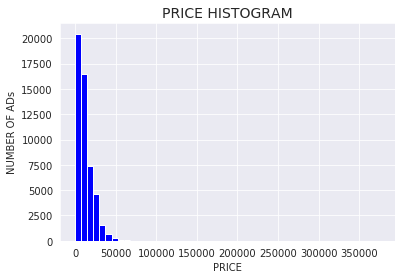

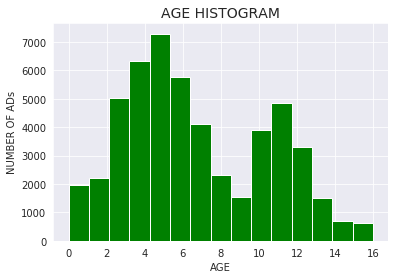

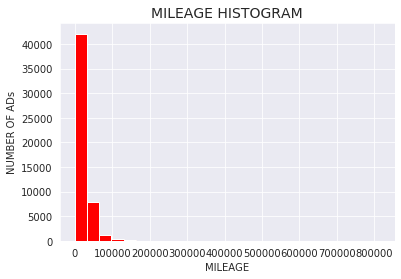

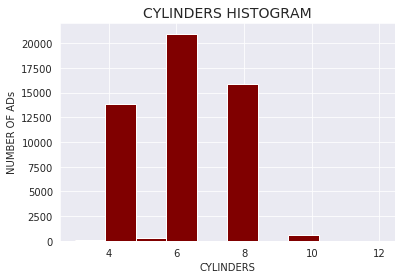

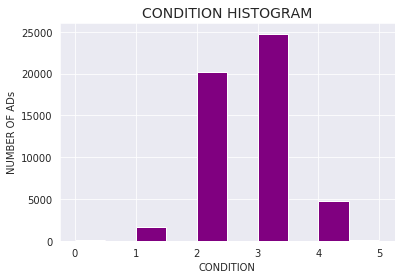

In [41]:
#PLOTTING HISTOGRAMS FOR: price, age, mileage, cylinders, condition
plt.figure(figsize = (36,20))
vehicles_us.hist('price', bins=50, color = 'blue')
plt.title('PRICE HISTOGRAM', size =14)
plt.xlabel('PRICE')
plt.ylabel('NUMBER OF ADs')
plt.show()

vehicles_us.hist('age', bins=15, color='green')
plt.title('AGE HISTOGRAM', size =14)
plt.xlabel('AGE')
plt.ylabel('NUMBER OF ADs')
plt.show()

vehicles_us.hist('mileage', bins=25, color = 'red')
plt.title('MILEAGE HISTOGRAM', size =14)
plt.xlabel('MILEAGE')
plt.ylabel('NUMBER OF ADs')
plt.show()

vehicles_us.hist('cylinders', bins=10, color = 'maroon')
plt.title('CYLINDERS HISTOGRAM', size =14)
plt.xlabel('CYLINDERS')
plt.ylabel('NUMBER OF ADs')
plt.show()

vehicles_us.hist('condition', bins=10, color = 'purple')
plt.title('CONDITION HISTOGRAM', size =14)
plt.xlabel('CONDITION')
plt.ylabel('NUMBER OF ADs')
plt.show()

- IDENTIFYING OUTLIERS AND COMMENTING THE FIRST HISTOGRAMS:

['price']       - From price histogram: 
                  all the values within 70000 are to take in consideration for further analysis, the others are outliers.
               
['age']         - From age histogram:
                  This histogram looks really clean.
               
['mileage']     - From mileage histrogram, identifying outliers: 
                  all the values within 200000 are to take in consideration for further analysis, the others are outliers.
               
['cylinders']   - From cylinders histogram:
                  We will keep the entire histogram, possibly to exclude values <2.
                  From a first analysis we indentify two really small columns at values 3 and 5.

['condition']   - From condition histogram:
                  Can investigate in a better way 0 and 5 values. Definitely gonna keep all values btw 1 and 4.       
                  

Watching those histagrams, we can easely understand that age, cylinders and condition are readable graphics, the other two should be divided to investigate them in a better way.

Printing out the column price values between 0 and 70000 (left histogram) and 0 to 30000 (right one)


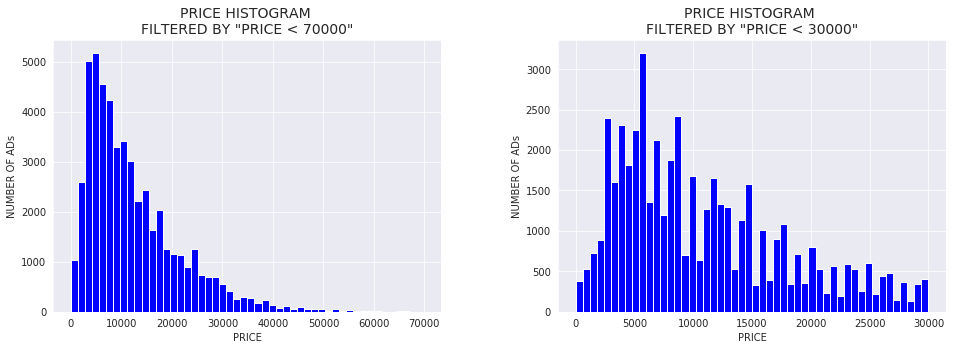


Printing out the outliers from price column:


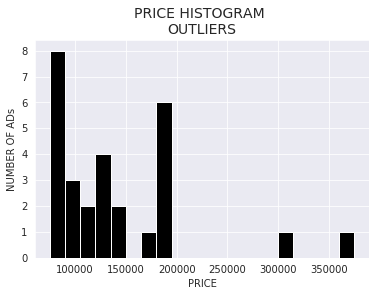

In [42]:
#INVESTIGATING PRICE
print('Printing out the column price values between 0 and 70000 (left histogram) and 0 to 30000 (right one)')

price_filtered = vehicles_us.query('price < 70000')
price_outliers = vehicles_us.query('price > 70000')
price_better_filtered = vehicles_us.query('price < 30000')

plt.figure(figsize=(16,5)) # specifying figure size
ax1 = plt.subplot(1,2,1)
price_filtered.hist('price', bins=50,color = 'blue', ax = ax1)
plt.title('PRICE HISTOGRAM \nFILTERED BY "PRICE < 70000"', size =14)
plt.xlabel('PRICE')
plt.ylabel('NUMBER OF ADs')
ax2 = plt.subplot(1,2,2)
price_better_filtered.hist('price', bins=50,color = 'blue', ax = ax2)
plt.title('PRICE HISTOGRAM \nFILTERED BY "PRICE < 30000"', size =14)
plt.xlabel('PRICE')
plt.ylabel('NUMBER OF ADs')
plt.show()
print('')

print('Printing out the outliers from price column:')
price_outliers.hist('price', bins=20,color = 'black')
plt.title('PRICE HISTOGRAM \nOUTLIERS', size =14)
plt.xlabel('PRICE')
plt.ylabel('NUMBER OF ADs')
plt.show()

First price quartile: 5400.0
Third price quartile: 16839.0

Confronting quantile variables obtained with the describe method:
count     51525.000000
mean      12320.352528
std        9924.869097
min           3.000000
25%        5400.000000
50%        9599.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

Showing the boxplot of price column values between 0 and 80000
I am going to highlith the first and the third quartile.
The majority of cars are sold between this range. In green we can see the median.


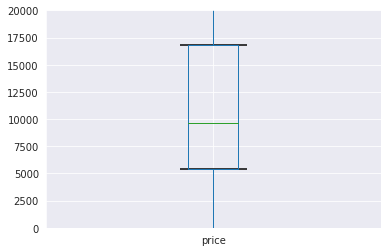

In [43]:
Q1_price = vehicles_us['price'].quantile(0.25)
Q3_price = vehicles_us['price'].quantile(0.75)
print("First price quartile:", Q1_price)
print("Third price quartile:", Q3_price) 
print('')
print('Confronting quantile variables obtained with the describe method:')
print(vehicles_us['price'].describe())
print('')
print('Showing the boxplot of price column values between 0 and 80000')
print('I am going to highlith the first and the third quartile.')
print('The majority of cars are sold between this range. In green we can see the median.')

plt.ylim(0, 20000)
vehicles_us.boxplot('price')
plt.hlines(y=[Q1_price, Q3_price], xmin=0.9, xmax=1.1, color='black') 
plt.show()

Showing the boxplot of price column values between 0 and 380000
Here we can see the price column outliers dispersion in a better way.


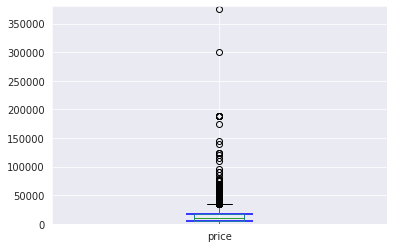

In [44]:
print('Showing the boxplot of price column values between 0 and 380000')
print('Here we can see the price column outliers dispersion in a better way.')
plt.ylim(0, 380000)
vehicles_us.boxplot('price')
plt.hlines(y=[Q1_price, Q3_price], xmin=0.9, xmax=1.1, color='blue') 
plt.show()

- INVESTIGATION OF ['price'] COLUMN.

In the first price histogram (see "#PLOTTING HISTOGRAMS FOR: price, age, mileage, cylinders, condition" section) we have an only really high peak of more then 20000 records that goes from 0 to more or less 10.000 and then another peak of 16000 records from 10.000 to 20.000. 

Those two peaks rapresents over the 69% of the entire database so to take a further look to the column I decided to divide this histograms in other three ones:

The first of them, counting values between 0 and 70.000 shows us a better view of the majority of the column values. here we can clearly see that between 4000 and 6000 we have at least 5000 ads.

This comes even more clear in the second histogram, were are comprehended values within 30000. Where we see the higher peak of 5000 ads at 6000 and then there are many bars rapresenting 2500 ads.

In the third histogram instead were shown outliers of the column with values >70000 there are 8 ads between 70000 and 85000. 6 at 175000 one around 300000 and 1 at 375000 wich was are previous max values. (shown in the describe method).

Furthermore, I plotted the box of the column (max value of 20.000) . finding first and third quartile and highlighting them. among those range of values (First price quartile: 5400.0 and Third price quartile: 16839.0) are comprehended the majority ads of the database. This confirmed our consideration on the first graph.

In the end, I plotted the same box (this time with max value of 38000) to have a better view of the column outliers dispersion.

Printing out the column mileage values between 0 and 180000 (left histogram) and 0 to 50000 (right one)


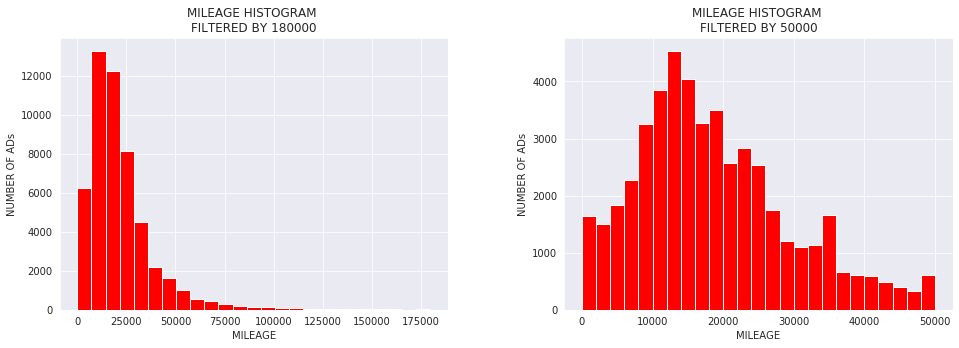


Printing out the outliers from mileage column:


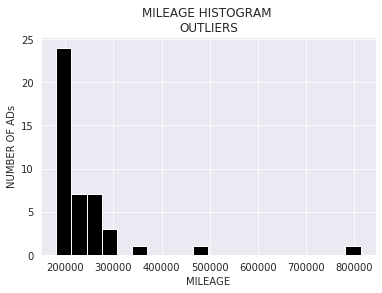

In [45]:
#INVESTIGATING MILEAGE
print('Printing out the column mileage values between 0 and 180000 (left histogram) and 0 to 50000 (right one)')
mileage_filtered = vehicles_us.query('mileage < 180000')             
mileage_outliers = vehicles_us.query('mileage > 180000')
mileage_better_filtered = vehicles_us.query('mileage < 50000')

plt.figure(figsize = (16,5))
ax1 = plt.subplot(1,2,1)
mileage_filtered.hist('mileage', bins=25, color='red', ax=ax1) 
plt.title('MILEAGE HISTOGRAM \nFILTERED BY 180000')
plt.xlabel('MILEAGE')
plt.ylabel('NUMBER OF ADs')
ax2 = plt.subplot(1,2,2)
mileage_better_filtered.hist('mileage', bins=25, color='red', ax=ax2) 
plt.title('MILEAGE HISTOGRAM \nFILTERED BY 50000')
plt.xlabel('MILEAGE')
plt.ylabel('NUMBER OF ADs')
plt.show()
print('')

print('Printing out the outliers from mileage column:')
mileage_outliers.hist('mileage', bins=20, color='black')   
plt.title('MILEAGE HISTOGRAM \nOUTLIERS')
plt.xlabel('MILEAGE')
plt.ylabel('NUMBER OF ADs')
plt.show()

First mileage quartile: 11200.0
Third mileage quartile: 26900.0

Confronting quantile variables obtained with the describe method:
count     51525.000000
mean      22215.282112
std       19579.030783
min           0.000000
25%       11200.000000
50%       17857.142857
75%       26900.000000
max      813542.000000
Name: mileage, dtype: float64

Showing the boxplot of mileage values included between 0 and 180000
I am going to highlith the first and the third quartile.
The majority of cars have kilometers included in this range. In green we can see the median.


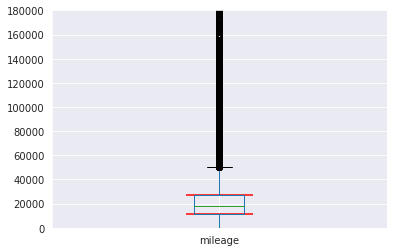

In [46]:
Q1_mileage = vehicles_us['mileage'].quantile(0.25)
Q3_mileage = vehicles_us['mileage'].quantile(0.75)
print("First mileage quartile:", Q1_mileage)
print("Third mileage quartile:", Q3_mileage) 
print('')
print('Confronting quantile variables obtained with the describe method:')
print(vehicles_us['mileage'].describe())
print('')
print('Showing the boxplot of mileage values included between 0 and 180000')
print('I am going to highlith the first and the third quartile.')
print('The majority of cars have kilometers included in this range. In green we can see the median.')

plt.ylim(0, 180000)
vehicles_us.boxplot('mileage')
plt.hlines(y=[Q1_mileage, Q3_mileage], xmin=0.9, xmax=1.1, color='red') 
plt.show()

Showing the boxplot of mileage values included between 0 and 380000
Here we can see the mileage column outliers dispersion in a better way.


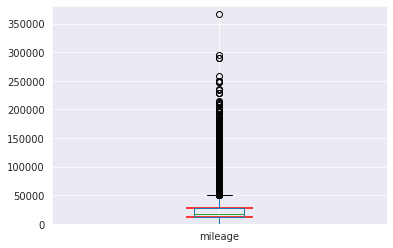

In [47]:
print('Showing the boxplot of mileage values included between 0 and 380000')
print('Here we can see the mileage column outliers dispersion in a better way.')

plt.ylim(0, 380000)
vehicles_us.boxplot('mileage')
plt.hlines(y=[Q1_mileage, Q3_mileage], xmin=0.9, xmax=1.1, color='red') 
plt.show()

- INVESTIGATION OF ['mileage'] COLUMN.
In the first mileage histogram (see "#PLOTTING HISTOGRAMS FOR: price, age, mileage, cylinders, condition" section) we have an only really high peak of more then 40000 records that goes from 0 to more or less 25000.

This peak alone rapresents over the 77% of the entire database so to take a further look to the column I decided to divide this histograms in other three ones:

The first of them, counting values between 0 and 170.000 shows us a better view of the majority of the column values. here we can clearly see that between 7500 and 20000 we have at least 11000 ads.

This comes even more clear in the second histogram, were are comprehended values within 50000. Where we see the higher peak of 4000 ads near to 12500.

In the third histogram instead were shown outliers of the column with values >170000 there are 25 ads between 170000 and 200000 km and we have three short columns of 1 or 2 ads at 350000, 475000 and 800000 km.

Furthermore, I plotted the box of the column (max value of 180000) . finding first and third quartile and highlighting them. among those range of values (First price quartile: 11200.0 and Third price quartile: 26900.0) are comprehended the majority ads of the database. This confirmed our consideration on the first graph.

In the end, I plotted the same box (this time with max value of 38000) to have a better view of the column outliers dispersion.

Printing out the days_listed column, entire column (left histogram) values btw 0/140 (center) value btw 0/70 (right side):


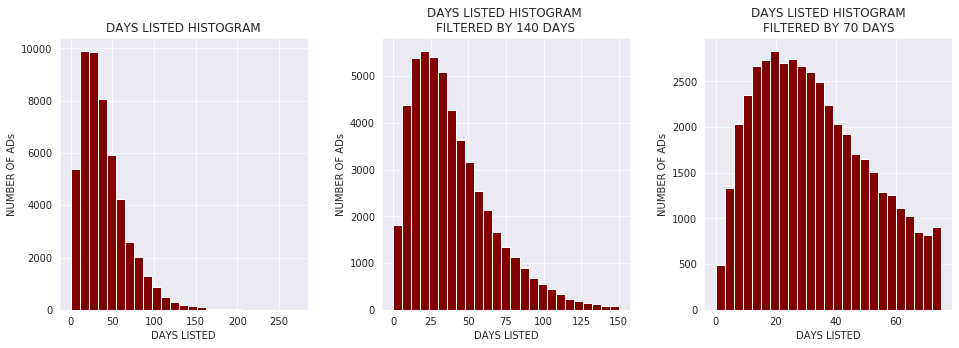

In [48]:
#INVESTIGATING days_listed.
print('Printing out the days_listed column, entire column (left histogram) values btw 0/140 (center) value btw 0/70 (right side):')

plt.figure(figsize=(16,5))
ax1 = plt.subplot(1,3,1)
vehicles_us.hist('days_listed', bins=25, color = 'maroon', ax=ax1)
plt.title('DAYS LISTED HISTOGRAM')
plt.xlabel('DAYS LISTED')
plt.ylabel('NUMBER OF ADs')
ax2 = plt.subplot(1,3,2)
vehicles_us.hist('days_listed', bins=25, range = (0,150), color = 'maroon', ax=ax2)
plt.title('DAYS LISTED HISTOGRAM \nFILTERED BY 140 DAYS')
plt.xlabel('DAYS LISTED')
plt.ylabel('NUMBER OF ADs')
ax3 = plt.subplot(1,3,3)
vehicles_us.hist('days_listed', bins=25, range = (0,75), color = 'maroon', ax=ax3)
plt.title('DAYS LISTED HISTOGRAM\nFILTERED BY 70 DAYS')
plt.xlabel('DAYS LISTED')
plt.ylabel('NUMBER OF ADs')
plt.show()

The mean from days_listed column is: 39.55475982532751
The median from days_listed column is: 33.0
First days_listed quartile: 19.0
Third days_listed quartile: 53.0

Confronting quantile, mean and median variables obtained with the describe method:
count    51525.00000
mean        39.55476
std         28.20427
min          0.00000
25%         19.00000
50%         33.00000
75%         53.00000
max        271.00000
Name: days_listed, dtype: float64

Showing the boxplot of mileage values included between 0 and 150
In this case I am going to highlith the min and max values for the majority of advertisements
Out of this range, we can define our column outliers
In green we can see the median.

The lower whisker is at: 2.0 days
The upper whisker is at: 104.0 days


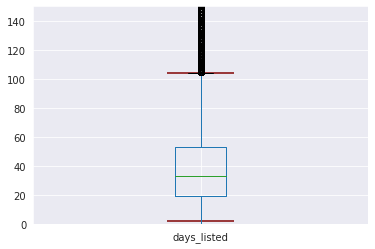

In [49]:
avg_days_listed = vehicles_us['days_listed'].mean()
median_days_listed = vehicles_us['days_listed'].median()
print('The mean from days_listed column is:', avg_days_listed)
print('The median from days_listed column is:',median_days_listed)
Q1_days_listed = vehicles_us['days_listed'].quantile(0.25)
Q3_days_listed = vehicles_us['days_listed'].quantile(0.75)
IQR= Q3_days_listed - Q1_days_listed
print("First days_listed quartile:", Q1_days_listed)
print("Third days_listed quartile:", Q3_days_listed) 
print('')
print('Confronting quantile, mean and median variables obtained with the describe method:')
print(vehicles_us['days_listed'].describe())
print('')
print('Showing the boxplot of mileage values included between 0 and 150')
print('In this case I am going to highlith the min and max values for the majority of advertisements')
print('Out of this range, we can define our column outliers')
print('In green we can see the median.')
print('')
print('The lower whisker is at:', (Q1_days_listed - (0.5*IQR)), 'days')
print('The upper whisker is at:',(Q3_days_listed + (1.5*IQR)), 'days')

plt.ylim(0, 150)
vehicles_us.boxplot('days_listed')
plt.hlines(y=[Q1_days_listed - (0.5*IQR), Q3_days_listed + (1.5*IQR)], xmin=0.9, xmax=1.1, color='maroon') 
plt.show()

Showing the boxplot of mileage values included between 104 and 271
Showing in this boxplot dispersion of the column.
In green we can see the median.

The upper whisker is at: 104.0 days
Printing out only values that were displayed above 104 days, to show outliers dispersion.


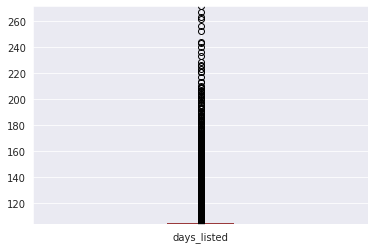

In [50]:
print('Showing the boxplot of mileage values included between 104 and 271')
print('Showing in this boxplot dispersion of the column.')
print('In green we can see the median.')
print('')
print('The upper whisker is at:',(Q3_days_listed + (1.5*IQR)), 'days')
print('Printing out only values that were displayed above 104 days, to show outliers dispersion.')

plt.ylim(104, 271)
vehicles_us.boxplot('days_listed')
plt.hlines(y=[Q1_days_listed - (0.5*IQR), Q3_days_listed + (1.5*IQR)], xmin=0.9, xmax=1.1, color='maroon')
plt.show()


- INVESTIGATION OF ['days_listed'] COLUMN HISTOGRAMS AND BOXPLOTS.

First of all I defined the mean and the median of ads. mean = 39.55 and median = 33.
First and third quartile are: 19 and 53. This mean that the majority of ads where displayed in this range.

In the first mileage histogram (this time shown togheter with the filtered others) we have an only really high peak of more then 10000 records that goes from 10 to 30.

This peak alone rapresents over the 20% of the entire database so to take a further look to the column I decided to divide this histograms in other two histograms:

The second histogram, counting values between 0 and 140 days shows us a better view of the majority of the column values. here we can clearly see that between 10 and 30 days we have at least 5000 ads for each of those values.

The third histogram, were are comprehended values within 70 days. Here we see the higher peak of at least 2500 ads between 12 and 32 days.

In the third histogram instead were shown outliers of the column with values >170000 there are 25 ads between 170000 and 200000 km and we have three short columns of 1 or 2 ads at 350000, 475000 and 800000 km.

Furthermore, I plotted the box of the column (max value of 140) . finding this time, upper and lower whiskers. Those values in my opinion, represent the lower and upper limit to definite column outliers. 

Were removed to quickly all the ads that were removed in 2 or less days. 
And all the ones that were posted over 104 days were listed for an abnormally long time.

In the end, plotted the box of the abnormally long time outliers to study their dispersion.

In [51]:
#Finding outliers in days_listed.
print('Printing out the count of days listed of ads grouped by type of vehicle.')
print()
print(vehicles_us.groupby('type')['days_listed'].count())
print()
print()
print('Printing out the mean of days listed of ads grouped by type of vehicle.')
print()
print(vehicles_us.groupby('type')['days_listed'].mean())
print()
print('Days_listed mean is around 40 days.')
print()
print('Printing out the median of days listed of ads grouped by type of vehicle.')
print()
print(vehicles_us.groupby('type')['days_listed'].median())
print()
print('Days_listed median is around 33 days.')

Printing out the count of days listed of ads grouped by type of vehicle.

type
SUV            12405
bus               24
convertible      446
coupe           2303
hatchback       1047
mini-van        1161
offroad          214
other            256
pickup          6988
sedan          12154
truck          12353
van              633
wagon           1541
Name: days_listed, dtype: int64


Printing out the mean of days listed of ads grouped by type of vehicle.

type
SUV            39.780895
bus            43.500000
convertible    39.192825
coupe          39.358663
hatchback      40.533906
mini-van       39.399655
offroad        40.397196
other          38.261719
pickup         39.283486
sedan          39.425045
truck          39.409536
van            40.695103
wagon          40.569111
Name: days_listed, dtype: float64

Days_listed mean is around 40 days.

Printing out the median of days listed of ads grouped by type of vehicle.

type
SUV            33.0
bus            44.5
convertible    33.0

In [52]:
print('Observing the upper and lower whiskers I can determine that ads <2 and >104 are to consider outliers.')
print('Creating two dataframe to store those values.')
good_ads = vehicles_us.query('days_listed > 2 and days_listed < 104')

Observing the upper and lower whiskers I can determine that ads <2 and >104 are to consider outliers.
Creating two dataframe to store those values.


In [53]:
print('Printing out the good ads dataframe.')
print('')
display(good_ads)
print('')
print('Printing out the describe method of good ads.')
print('')
print(good_ads.describe())
print('')
print('Printing out the info method of good ads.')
print(good_ads.info())

Printing out the good ads dataframe.



,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year,age,mileage
0,9400.0,2012,bmw x5,2,6,gas,145000.0,automatic,SUV,not_specified,1,2018-06-23,19,5,6,2018,6,24166.666667
1,25500.0,2013,ford f-150,2,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,4,10,2018,5,17741.000000
2,5500.0,2011,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,3,2,2019,8,13750.000000
3,1500.0,2013,ford f-150,1,8,gas,114000.0,automatic,pickup,not_specified,0,2019-03-22,9,4,3,2019,6,19000.000000
4,14900.0,2015,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,1,4,2019,4,20225.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249.0,2014,nissan maxima,4,6,gas,88136.0,automatic,sedan,black,0,2018-10-03,37,2,10,2018,4,22034.000000
51521,2700.0,2012,honda civic,0,4,gas,181500.0,automatic,sedan,white,0,2018-11-14,22,2,11,2018,6,30250.000000
51522,3950.0,2011,hyundai sonata,3,4,gas,128000.0,automatic,sedan,blue,0,2018-11-15,32,3,11,2018,7,18285.714286
51523,7455.0,2010,toyota corolla,2,4,gas,139573.0,automatic,sedan,black,0,2018-07-02,71,0,7,2018,8,17446.625000



Printing out the describe method of good ads.

               price    model_year     condition     cylinders       odometer  \
count   49338.000000  49338.000000  49338.000000  49338.000000   49338.000000   
mean    12320.982123   2011.527768      2.636872      6.111942  115017.362358   
std      9942.985328      3.490339      0.712955      1.574048   60440.800840   
min         3.000000   2003.000000      0.000000      3.000000       0.000000   
25%      5400.000000   2008.000000      2.000000      4.000000   77412.500000   
50%      9600.000000   2012.000000      3.000000      6.000000  113400.000000   
75%     16889.500000   2014.000000      3.000000      8.000000  146537.750000   
max    375000.000000   2018.000000      5.000000     12.000000  990000.000000   

             is_4wd   days_listed       weekday         month          year  \
count  49338.000000  49338.000000  49338.000000  49338.000000  49338.000000   
mean       0.496453     36.905894      3.006709      6.631359   

In [54]:
print('Number of "bad" ads is:', (len(vehicles_us) - len(good_ads)))
print()
print('Determining how many are lower outliers.')
low_ads = vehicles_us.query('days_listed <= 2')

Number of "bad" ads is: 2187

Determining how many are lower outliers.


In [55]:
print('Printing out the resulting dataframe:')
print('')
display(low_ads)
print('')
print('Printing out the describe method of lower-bad ads.')
print('')
print(low_ads.describe())
print('')
print('Printing out the info method of lower-bad ads.')
print('')
print(low_ads.info())
print('')
print('Number of "lower-bad" ads is:', (len(low_ads)))

Printing out the resulting dataframe:



,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year,age,mileage
39,8000.0,2013,ford f-150,2,8,gas,234000.0,automatic,truck,black,1,2019-03-31,1,6,3,2019,6,39000.000000
59,5200.0,2008,toyota highlander,2,6,gas,186000.0,automatic,SUV,green,0,2018-12-20,2,3,12,2018,10,18600.000000
84,4995.0,2017,hyundai elantra,4,4,gas,151223.0,automatic,sedan,custom,0,2018-09-15,1,5,9,2018,1,151223.000000
120,33900.0,2018,chevrolet silverado 1500 crew,2,8,gas,11315.0,other,pickup,white,1,2019-03-01,2,4,3,2019,1,11315.000000
173,21100.0,2017,chevrolet camaro lt coupe 2d,2,6,gas,24510.0,other,coupe,red,0,2019-03-29,1,4,3,2019,2,12255.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51089,17995.0,2015,ram 1500,3,6,gas,126800.0,automatic,truck,custom,1,2019-04-17,2,2,4,2019,4,31700.000000
51202,22900.0,2015,ram 1500,3,6,gas,139900.0,automatic,truck,white,1,2019-03-28,2,3,3,2019,4,34975.000000
51297,19500.0,2014,chevrolet silverado 1500,2,6,gas,81463.0,automatic,truck,grey,1,2018-05-17,1,3,5,2018,4,20365.750000
51359,2999.0,2005,ford taurus,2,6,gas,136000.0,automatic,sedan,not_specified,0,2018-10-22,0,0,10,2018,13,10461.538462



Printing out the describe method of lower-bad ads.

              price   model_year   condition   cylinders       odometer  \
count    486.000000   486.000000  486.000000  486.000000     486.000000   
mean   13341.577756  2011.419753    2.689300    6.065844  110896.980453   
std    10238.560551     3.671111    0.723799    1.561055   60208.463711   
min       65.000000  2003.000000    0.000000    4.000000       0.000000   
25%     5671.250000  2008.000000    2.000000    4.000000   70986.750000   
50%    10795.000000  2012.000000    3.000000    6.000000  112466.000000   
75%    18000.000000  2014.000000    3.000000    8.000000  140000.000000   
max    59589.000000  2018.000000    5.000000   10.000000  433120.000000   

           is_4wd  days_listed     weekday       month         year  \
count  486.000000   486.000000  486.000000  486.000000   486.000000   
mean     0.489712     1.421811    2.839506    6.724280  2018.304527   
std      0.500409     0.683425    2.133426    3.468579    

In [56]:
print('Determining how many are upper outliers.')
upper_ads = vehicles_us.query('days_listed >= 104')
print(upper_ads)
print('')
print('Printing out the describe method of upper-bad ads.')
print('')
print(upper_ads.describe())
print('')
print('Printing out the info method of upper-bad ads.')
print('')
print(upper_ads.info())
print('')
print('Number of "upper-bad" ads is:', (len(upper_ads)))

Determining how many are upper outliers.
         price  model_year                         model  condition  \
15     17990.0        2015                      ram 1500          3   
34      9500.0        2008             toyota highlander          2   
51      3800.0        2014                    ford focus          2   
89     18800.0        2017  chevrolet camaro lt coupe 2d          2   
104    22900.0        2014   ford f150 supercrew cab xlt          2   
...        ...         ...                           ...        ...   
51368   2775.0        2014                    ford focus          3   
51374   9700.0        2007                 honda odyssey          2   
51407   5495.0        2012                  jeep liberty          2   
51489   1200.0        2012              volkswagen jetta          1   
51502   7995.0        2013             chevrolet equinox          4   

       cylinders fuel  odometer transmission      type    paint_color  is_4wd  \
15             8  gas  10

- Conclusions on days_listed outliers.

First of all i found the mean and median that ads were listed for each vehicle type. \
Previously I determined the columun whiskers at 2 days and 104 days. other values are outliers.\
days_listed mean is around 40 days and days_listed median is around 33 days.\
Then I created three databases to store: 
- good_ads (between the upper and lower wishkers, ads that were on the site from 2 to 104 days.) 
- lower-bad (The ads proposed on the site for less then 2 days.)
- upper-bad (The ads proposed on the site for more then 104 days.)

Printing out days listed entire column histogram (yellow) and only the good ads histogram (pink):


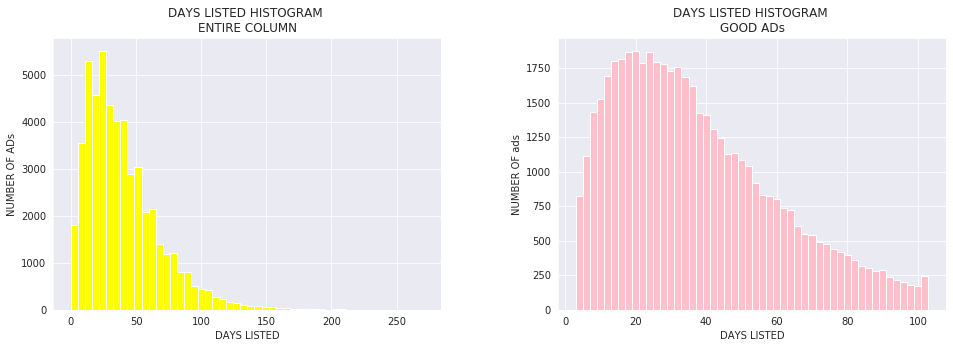


Printing out days listed lower outliers (left) and upper outliers (right):


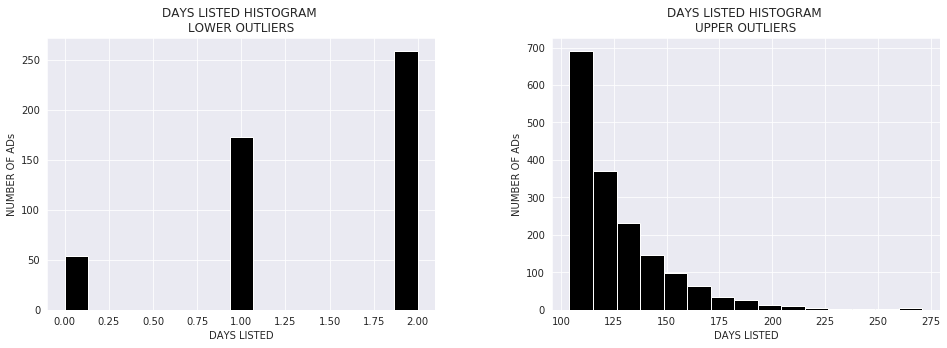

In [57]:
print('Printing out days listed entire column histogram (yellow) and only the good ads histogram (pink):')
plt.figure(figsize = (16,5))
ax1 = plt.subplot(1,2,1)
vehicles_us.hist('days_listed', bins=50, color = 'yellow', ax=ax1)
plt.title('DAYS LISTED HISTOGRAM \nENTIRE COLUMN')
plt.xlabel('DAYS LISTED')
plt.ylabel('NUMBER OF ADs')
ax2 = plt.subplot(1,2,2)
good_ads.hist('days_listed', bins=50, color='pink', ax=ax2)
plt.title('DAYS LISTED HISTOGRAM \nGOOD ADs')
plt.xlabel('DAYS LISTED')
plt.ylabel('NUMBER OF ads')
plt.show()
print('')
print('Printing out days listed lower outliers (left) and upper outliers (right):')
plt.figure(figsize = (16,5))
ax1 = plt.subplot(1,2,1)
low_ads.hist('days_listed', bins=15, color = 'black', ax=ax1)
plt.title('DAYS LISTED HISTOGRAM \nLOWER OUTLIERS')
plt.xlabel('DAYS LISTED')
plt.ylabel('NUMBER OF ADs')
ax2 = plt.subplot(1,2,2)
upper_ads.hist('days_listed', bins=15, color = 'black', ax=ax2)
plt.title('DAYS LISTED HISTOGRAM \nUPPER OUTLIERS')
plt.xlabel('DAYS LISTED')
plt.ylabel('NUMBER OF ADs')
plt.show()

HISTOGRAMS: 
- In the yellow histogram, we can see our starting situation, with the entire dataframe.
- In the pink histogram, we can see only the good ads. (btw 2 days and 104 days).
- In the 2 black histograms, we have instead lower and upper outliers.

Count of ads grouped by type of vehicle:
type
SUV            12405
bus               24
convertible      446
coupe           2303
hatchback       1047
mini-van        1161
offroad          214
other            256
pickup          6988
sedan          12154
truck          12353
van              633
wagon           1541
Name: price, dtype: int64


The two largest values are:
type
SUV      12405
truck    12353
Name: price, dtype: int64

Plotting the graph showing the count of ads divided by vehicle type:



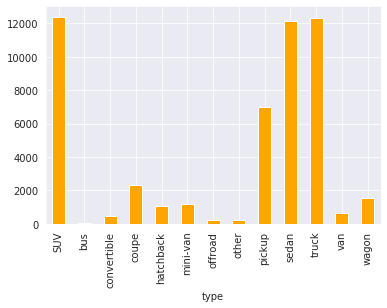

In [58]:
#Analyzing the number of ads and the average price for each vehicle types.
print('Count of ads grouped by type of vehicle:')
type_count = (vehicles_us.groupby('type')['price'].count())
type_count_df = (vehicles_us.groupby('type'))
print(type_count_df)
print(type_count)
print('')
print('')
print('The two largest values are:')
print(type_count.nlargest(2))
print('')
print('Plotting the graph showing the count of ads divided by vehicle type:')
print('')
type_count.plot(kind='bar', color='orange')
plt.show()

Those lines of code are just showing count of ads per type of vehicles. Plotted bar charts graph of the situation and choosen the two largest values of them: SUV and TRUCK are the more quoted vehicle types with 12405 and 12353 ads.

In [59]:
#saving types dataframes.
suv = vehicles_us.query('type ==  "SUV"')
bus = vehicles_us.query('type ==  "bus"')
convertible = vehicles_us.query('type == "convertible"')
coupe = vehicles_us.query('type ==  "coupe"')
hatchback = vehicles_us.query('type ==  "hatchback"')
mini_van = vehicles_us.query('type ==  "mini-van"')
offroad = vehicles_us.query('type ==  "offroad"')
other = vehicles_us.query('type ==  "other"')
pickup = vehicles_us.query('type ==  "pickup"')
sedan = vehicles_us.query('type ==  "sedan"')
truck = vehicles_us.query('type ==  "truck"')
van = vehicles_us.query('type == "van"')
wagon = vehicles_us.query('type ==  "wagon"')

In [60]:
print('Pearson correlation method for SUV type:')
print('')
display(suv.corr(method='pearson'))

Pearson correlation method for SUV type:



,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,weekday,month,year,age,mileage
price,1.000000,0.029020,0.287472,0.098570,-0.534329,0.130530,-0.016024,0.006666,-0.010262,0.008099,-0.027405,-0.357521
model_year,0.029020,1.000000,0.049016,-0.273882,-0.204939,0.046694,-0.008836,0.003827,0.009141,-0.005614,-0.988115,0.535007
condition,0.287472,0.049016,1.000000,-0.076515,-0.315025,-0.012584,-0.016188,0.008685,0.000907,-0.001742,-0.048659,-0.194254
cylinders,0.098570,-0.273882,-0.076515,1.000000,0.176047,0.124556,0.016784,-0.008709,-0.004380,0.002221,0.270732,-0.044350
odometer,-0.534329,-0.204939,-0.315025,0.176047,1.000000,0.012564,0.013859,0.009143,0.012968,-0.012544,0.200398,0.570861
is_4wd,0.130530,0.046694,-0.012584,0.124556,0.012564,1.000000,-0.004931,0.014955,-0.000966,-0.006396,-0.047082,0.043429
days_listed,-0.016024,-0.008836,-0.016188,0.016784,0.013859,-0.004931,1.000000,-0.009357,-0.005001,-0.000610,0.008630,-0.000073
weekday,0.006666,0.003827,0.008685,-0.008709,0.009143,0.014955,-0.009357,1.000000,0.021472,-0.017161,-0.006416,0.010303
month,-0.010262,0.009141,0.000907,-0.004380,0.012968,-0.000966,-0.005001,0.021472,1.000000,-0.817315,-0.134661,0.114932
year,0.008099,-0.005614,-0.001742,0.002221,-0.012544,-0.006396,-0.000610,-0.017161,-0.817315,1.000000,0.159262,-0.130682


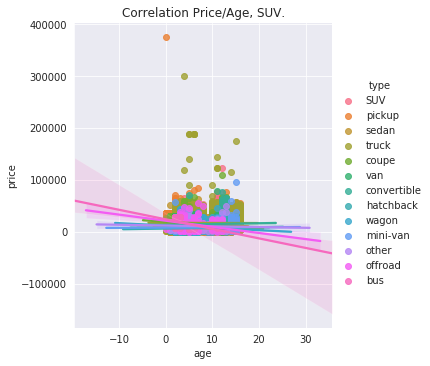

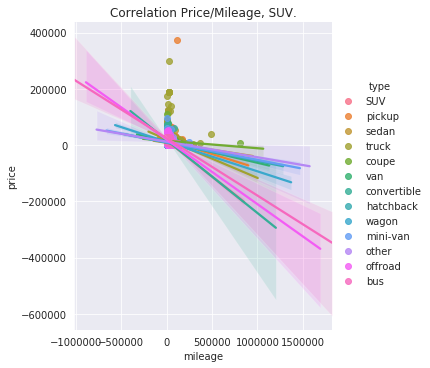

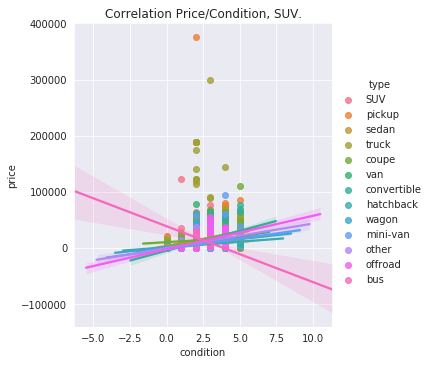

In [61]:
#I DECIDED TO PLOT THE PEARSON CORRELATION AMONG AGE, MILEAGE AND CONDITION ON THE PRICE VARIABLE, FIRST OF ALL, 
#ACROSS THE ENTIRE DATABASE GROUPED BY TYPE. 

#Then I went on the specific of each vehicle type. This to allow us, to compare the different types with the entire dataset.

import seaborn as sns

#we can here use as well regplot in order to draw a subplot, but I wanted to keep this graph much more clear and understandable.
sns.lmplot( x = 'age', y='price', data = vehicles_us, hue = 'type')
plt.title('Correlation Price/Age, SUV.')
plt.show()
sns.lmplot( x = 'mileage', y='price', data = vehicles_us, hue = 'type')
plt.title('Correlation Price/Mileage, SUV.')
plt.show()
sns.lmplot( x = 'condition', y='price', data = vehicles_us, hue = 'type')
plt.title('Correlation Price/Condition, SUV.')
plt.show()

In the three scatterplot shown we can understand correlations in the entire database grouped by (different colors) type:
 - We see that age condition the price slightly down. At a first sight we can understand that the age affect much more the        price of busses, and the type wich is not so much affected by age is convertible, here we can clearly see a slight increase. 
 - We see that mileage condition the price almost strongly down, the type more affect by this decrease is convertible, instead    coupe is the less one affected.
 - We see that the condition of the vehicles higher the price (van has a strongly proportional dependence) but as we can see,      not for busses that suffer a sharp decrease.
 
 Looking at the point distribution in plot is even of clear understanding the distribution of values.

interactive(children=(IntSlider(value=4, description='height', max=10, min=2, step=3), IntSlider(value=2, desc…

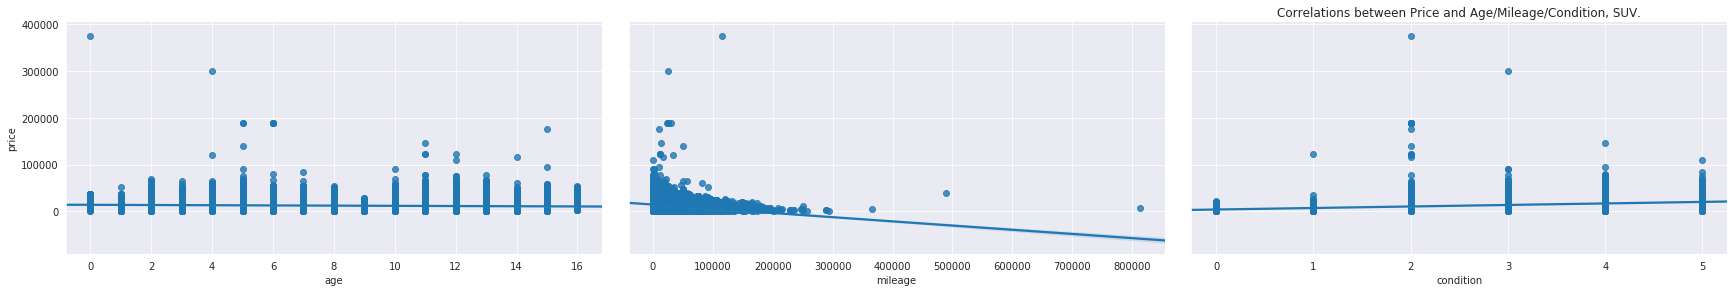

In [62]:
from ipywidgets import interactive
import seaborn as sns

def size_widget(height=4, aspect=2.5):
    sns.pairplot(vehicles_us, y_vars=['price'], x_vars=['age', 'mileage', 'condition'], kind ='reg', height=height, aspect = aspect)
    plt.title('Correlations between Price and Age/Mileage/Condition, SUV.')

interactive(size_widget, height=(2, 10, 3), aspect=(2, 10, 2))

In the table and the three scatterplot shown we can understand correlations in the SUV category dataframe. 
 - We see that age condition the price slightly down.
 - We see that mileage condition the price almost strongly down.
 - We see that the condition of the vehicles higher the price .
 
 Looking at the point distribution in plot is even of clear understanding concetrations of values.

In [63]:
print('Pearson correlation method for BUS type:')
print('')
display(bus.corr(method='pearson'))

Pearson correlation method for BUS type:



,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,weekday,month,year,age,mileage
price,1.000000,0.473037,-0.366084,0.355172,-0.901864,NaN,0.395261,-0.227010,-0.422394,0.219739,-0.446315,-0.671179
model_year,0.473037,1.000000,-0.449151,0.581192,-0.161252,NaN,-0.091272,-0.095445,-0.495377,0.194424,-0.987283,0.199198
condition,-0.366084,-0.449151,1.000000,-0.422104,0.020332,NaN,0.100593,0.142164,0.345762,-0.296174,0.409592,0.122176
cylinders,0.355172,0.581192,-0.422104,1.000000,-0.122213,NaN,-0.104142,0.000000,-0.090538,-0.200327,-0.624579,0.147493
odometer,-0.901864,-0.161252,0.020332,-0.122213,1.000000,NaN,-0.565034,0.206708,0.189719,-0.058404,0.154817,0.808784
is_4wd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
days_listed,0.395261,-0.091272,0.100593,-0.104142,-0.565034,NaN,1.000000,0.035812,0.066918,-0.050060,0.084874,-0.533409
weekday,-0.227010,-0.095445,0.142164,0.000000,0.206708,NaN,0.035812,1.000000,0.133675,0.000000,0.097238,0.197109
month,-0.422394,-0.495377,0.345762,-0.090538,0.189719,NaN,0.066918,0.133675,1.000000,-0.846607,0.367483,0.097482
year,0.219739,0.194424,-0.296174,-0.200327,-0.058404,NaN,-0.050060,0.000000,-0.846607,1.000000,-0.036014,-0.135557


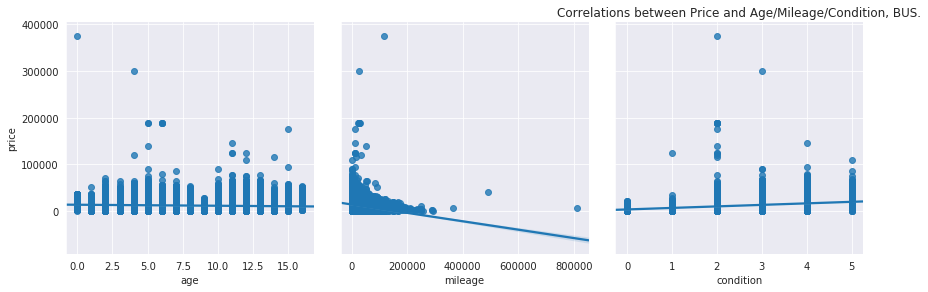

In [64]:
import seaborn as sns

sns.pairplot(vehicles_us, y_vars=['price'], x_vars=['age', 'mileage', 'condition'], kind ='reg', height=4, aspect = 1)
plt.title('Correlations between Price and Age/Mileage/Condition, BUS.') #was not able to understand the way to put the title in the center.
plt.show()

In the table and the three scatterplot shown we can understand correlations in the BUS category dataframe. 
 - We see that age condition the price strongly down.
 - We see that mileage condition the price strongly down.
 - We see that the condition of the vehicles lower slightly the price. (this time cause it goes from an almost "excellent"          condition to a lower one, wich is "good".

In [65]:
print('Pearson correlation method for convertible type type:')
print('')
display(convertible.corr(method='pearson'))

Pearson correlation method for convertible type type:



,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,weekday,month,year,age,mileage
price,1.000000,-0.051147,0.440183,0.275662,-0.270870,-0.014680,-0.005045,-0.030051,0.005161,-0.044686,0.045206,-0.217998
model_year,-0.051147,1.000000,-0.036774,-0.374385,-0.003419,0.412210,-0.036221,-0.037061,-0.053190,0.049521,-0.991458,0.620605
condition,0.440183,-0.036774,1.000000,0.212645,-0.191134,0.015692,-0.057417,0.008653,-0.044041,0.005061,0.037358,-0.148461
cylinders,0.275662,-0.374385,0.212645,1.000000,-0.178056,-0.250132,-0.051807,-0.052143,0.064768,-0.055957,0.366301,-0.351739
odometer,-0.270870,-0.003419,-0.191134,-0.178056,1.000000,0.094617,0.040565,0.033674,0.000005,-0.009196,0.002211,0.672714
is_4wd,-0.014680,0.412210,0.015692,-0.250132,0.094617,1.000000,0.049640,-0.090919,-0.014681,0.032589,-0.407099,0.356273
days_listed,-0.005045,-0.036221,-0.057417,-0.051807,0.040565,0.049640,1.000000,0.075118,-0.019611,-0.007666,0.035144,0.013775
weekday,-0.030051,-0.037061,0.008653,-0.052143,0.033674,-0.090919,0.075118,1.000000,-0.003988,0.000895,0.037101,0.005535
month,0.005161,-0.053190,-0.044041,0.064768,0.000005,-0.014681,-0.019611,-0.003988,1.000000,-0.832981,-0.055693,0.065539
year,-0.044686,0.049521,0.005061,-0.055957,-0.009196,0.032589,-0.007666,0.000895,-0.832981,1.000000,0.081165,-0.074703


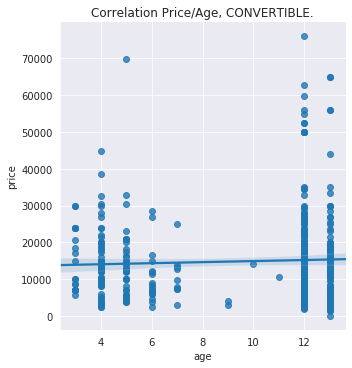

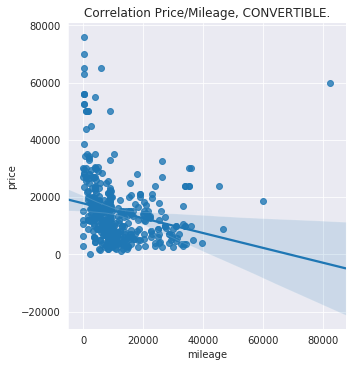

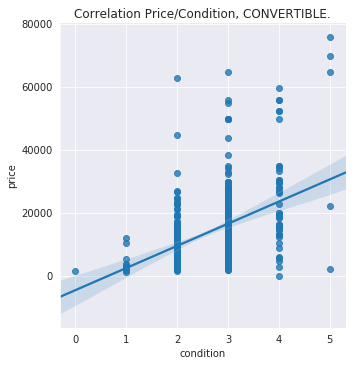

In [66]:
import seaborn as sns
#I decided to go back to lmplot cause has a better visualization but I left SUV and BUS example of pairplot cause I was struggling to find a way to visualize them side by side.
sns.lmplot( x = 'age', y='price', data=convertible)
plt.title('Correlation Price/Age, CONVERTIBLE.')
plt.show()
sns.lmplot( x = 'mileage', y='price', data=convertible)
plt.title('Correlation Price/Mileage, CONVERTIBLE.')
plt.show()
sns.lmplot( x = 'condition', y='price', data=convertible)
plt.title('Correlation Price/Condition, CONVERTIBLE.')
plt.show()

In the table and the three scatterplot shown we can understand correlations in the CONVERTIBLE category dataframe. 
 - We see that age condition the price slightly up. This cause if they are old, they are defined as "vintage".
 - We see that mileage condition the price strongly down. 
 - We see that the condition of the vehicles higher strongly the price. 

In [67]:
print('Pearson correlation method for COUPE type:')
print('')
display(coupe.corr(method='pearson'))

Pearson correlation method for COUPE type:



,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,weekday,month,year,age,mileage
price,1.000000,0.279421,0.111338,0.444335,-0.594381,-0.042151,-0.011380,-0.031625,0.025301,-0.005954,-0.279289,-0.061032
model_year,0.279421,1.000000,-0.309140,-0.065900,-0.298571,-0.011139,-0.011267,-0.045528,0.017356,0.023311,-0.995125,0.424215
condition,0.111338,-0.309140,1.000000,0.057353,-0.078122,0.119568,0.004640,-0.004058,0.013826,-0.014604,0.306904,-0.216936
cylinders,0.444335,-0.065900,0.057353,1.000000,-0.344301,0.319371,0.000746,-0.003492,0.038137,-0.027847,0.062983,-0.114774
odometer,-0.594381,-0.298571,-0.078122,-0.344301,1.000000,-0.094976,-0.000270,-0.005259,-0.017711,0.002262,0.298025,0.357361
is_4wd,-0.042151,-0.011139,0.119568,0.319371,-0.094976,1.000000,-0.013902,0.005962,0.024664,-0.011608,0.009965,-0.079411
days_listed,-0.011380,-0.011267,0.004640,0.000746,-0.000270,-0.013902,1.000000,0.009290,-0.040389,0.026227,0.013825,-0.029651
weekday,-0.031625,-0.045528,-0.004058,-0.003492,-0.005259,0.005962,0.009290,1.000000,-0.014069,-0.000827,0.045329,-0.031180
month,0.025301,0.017356,0.013826,0.038137,-0.017711,0.024664,-0.040389,-0.014069,1.000000,-0.821364,-0.098333,0.135935
year,-0.005954,0.023311,-0.014604,-0.027847,0.002262,-0.011608,0.026227,-0.000827,-0.821364,1.000000,0.075393,-0.127280


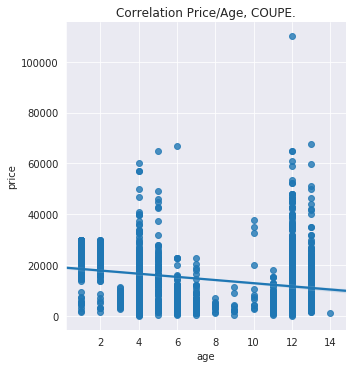

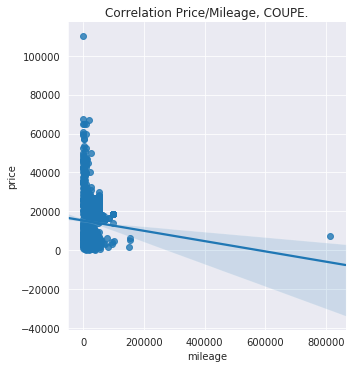

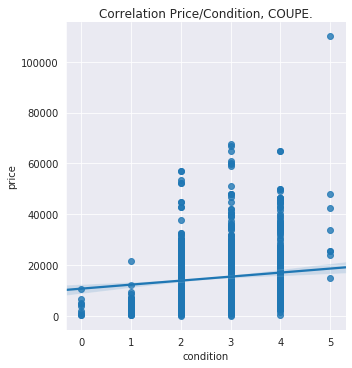

In [68]:
import seaborn as sns

sns.lmplot( x = 'age', y='price', data=coupe)
plt.title('Correlation Price/Age, COUPE.')
plt.show()
sns.lmplot( x = 'mileage', y='price', data=coupe)
plt.title('Correlation Price/Mileage, COUPE.')
plt.show()
sns.lmplot( x = 'condition', y='price', data=coupe)
plt.title('Correlation Price/Condition, COUPE.')
plt.show()

In the table and the three scatterplot shown we can understand correlations in the COUPE category dataframe. 
 - We see that age condition the price very strongly down. 
 - We see that mileage has a really uniform concetration, so the line is almost straight
 - We see that the condition of the vehicles higher slightly the price. 

In [69]:
print('Pearson correlation method for HATCHBACK type:')
print('')
display(hatchback.corr(method='pearson'))

Pearson correlation method for HATCHBACK type:



,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,weekday,month,year,age,mileage
price,1.000000,-0.080734,0.347034,0.171035,-0.494096,0.029283,0.014291,-0.011241,-0.030104,0.007576,0.081178,-0.291585
model_year,-0.080734,1.000000,0.025614,-0.211047,-0.222011,-0.188634,0.016819,0.040123,-0.024271,0.028758,-0.982941,0.498641
condition,0.347034,0.025614,1.000000,0.016207,-0.276466,-0.030094,0.040619,0.021553,-0.015967,0.039291,-0.018083,-0.154906
cylinders,0.171035,-0.211047,0.016207,1.000000,-0.088948,0.095506,0.026806,0.016887,-0.008504,-0.010847,0.206568,-0.072956
odometer,-0.494096,-0.222011,-0.276466,-0.088948,1.000000,0.081828,-0.020099,-0.038161,0.074785,-0.037937,0.212418,0.423601
is_4wd,0.029283,-0.188634,-0.030094,0.095506,0.081828,1.000000,0.043600,-0.058764,-0.022617,0.014772,0.189132,-0.097846
days_listed,0.014291,0.016819,0.040619,0.026806,-0.020099,0.043600,1.000000,-0.024303,0.017080,0.011515,-0.014502,-0.033098
weekday,-0.011241,0.040123,0.021553,0.016887,-0.038161,-0.058764,-0.024303,1.000000,0.016367,-0.003732,-0.040338,0.014250
month,-0.030104,-0.024271,-0.015967,-0.008504,0.074785,-0.022617,0.017080,0.016367,1.000000,-0.818329,-0.126587,0.133705
year,0.007576,0.028758,0.039291,-0.010847,-0.037937,0.014772,0.011515,-0.003732,-0.818329,1.000000,0.155579,-0.125647


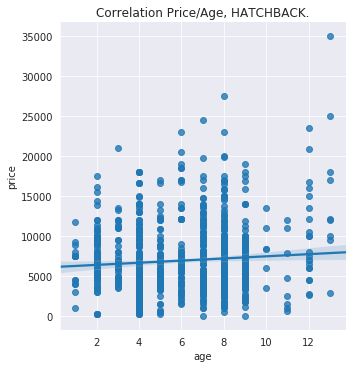

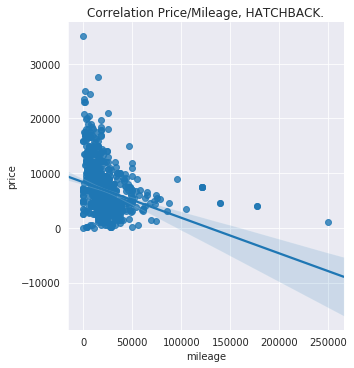

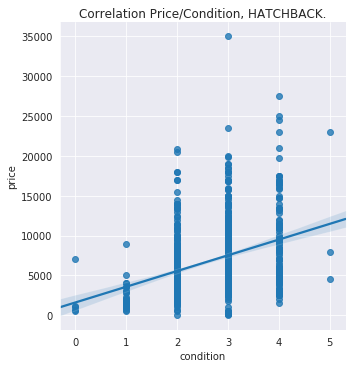

In [70]:
import seaborn as sns

sns.lmplot( x = 'age', y='price', data=hatchback)
plt.title('Correlation Price/Age, HATCHBACK.')
plt.show()
sns.lmplot( x = 'mileage', y='price', data=hatchback)
plt.title('Correlation Price/Mileage, HATCHBACK.')
plt.show()
sns.lmplot( x = 'condition', y='price', data=hatchback)
plt.title('Correlation Price/Condition, HATCHBACK.')
plt.show()

In the table and the three scatterplot shown we can understand correlations in the HATCHBACK category dataframe. 
 - We see that age condition the price slightly up.
 - We see that mileage is inversely proportional to price.
 - We see that the condition of the vehicles is directly proportional to price.

In [71]:
print('Pearson correlation method for MINI-VAN type:')
print('')
display(mini_van.corr(method='pearson'))

Pearson correlation method for MINI-VAN type:



,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,weekday,month,year,age,mileage
price,1.000000,-0.024190,0.402368,0.084940,-0.546586,0.029196,-0.002939,-0.011789,-0.044142,0.043392,0.028159,-0.227868
model_year,-0.024190,1.000000,0.002467,0.029232,-0.197865,-0.165445,0.009538,0.014014,0.044962,-0.048331,-0.995327,0.694482
condition,0.402368,0.002467,1.000000,0.072599,-0.427917,-0.007005,-0.008391,-0.005829,-0.004699,0.028368,0.000298,-0.202905
cylinders,0.084940,0.029232,0.072599,1.000000,-0.079492,0.020421,0.020436,0.059060,-0.008158,0.004567,-0.028517,-0.015022
odometer,-0.546586,-0.197865,-0.427917,-0.079492,1.000000,0.039150,0.010850,0.017195,0.002639,-0.008656,0.195179,0.331495
is_4wd,0.029196,-0.165445,-0.007005,0.020421,0.039150,1.000000,0.024742,0.016068,0.050730,-0.040409,0.159993,-0.068900
days_listed,-0.002939,0.009538,-0.008391,0.020436,0.010850,0.024742,1.000000,-0.001051,-0.030538,0.022500,-0.007273,0.022215
weekday,-0.011789,0.014014,-0.005829,0.059060,0.017195,0.016068,-0.001051,1.000000,-0.033084,0.043115,-0.009715,0.028077
month,-0.044142,0.044962,-0.004699,-0.008158,0.002639,0.050730,-0.030538,-0.033084,1.000000,-0.818075,-0.123626,0.139565
year,0.043392,-0.048331,0.028368,0.004567,-0.008656,-0.040409,0.022500,0.043115,-0.818075,1.000000,0.144550,-0.178233


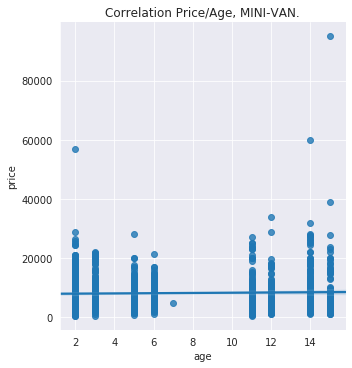

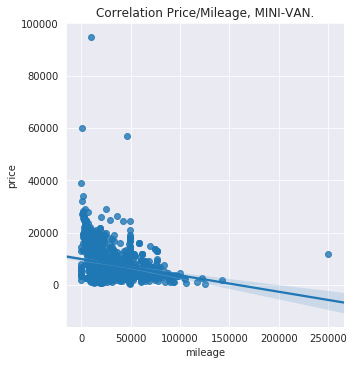

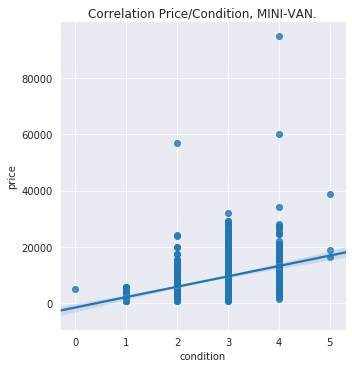

In [72]:
import seaborn as sns

sns.lmplot( x = 'age', y='price', data=mini_van)
plt.title('Correlation Price/Age, MINI-VAN.')
plt.show()
sns.lmplot( x = 'mileage', y='price', data=mini_van)
plt.title('Correlation Price/Mileage, MINI-VAN.')
plt.show()
sns.lmplot( x = 'condition', y='price', data=mini_van)
plt.title('Correlation Price/Condition, MINI-VAN.')
plt.show()

In the table and the three scatterplot shown we can understand correlations in the MINI-VAN category dataframe. 
 - We see that age condition higher slightly the price
 - We see that mileage is inversely proportional to the price
 - We see that the condition of the vehicles is directly proportional to the price.

In [73]:
print('Pearson correlation method for OFFROAD type:')
print('')
display(offroad.corr(method='pearson'))

Pearson correlation method for OFFROAD type:



,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,weekday,month,year,age,mileage
price,1.000000,0.243531,0.463008,0.122759,-0.621911,0.122982,-0.001403,0.007031,0.020364,-0.041760,-0.248875,-0.339603
model_year,0.243531,1.000000,0.111449,-0.152828,-0.318527,0.034725,0.046576,-0.112364,-0.049082,0.039460,-0.975548,0.381725
condition,0.463008,0.111449,1.000000,0.042192,-0.421058,0.060409,-0.050607,0.172263,0.155478,-0.135665,-0.139532,-0.255046
cylinders,0.122759,-0.152828,0.042192,1.000000,0.033056,0.082007,-0.003228,-0.006536,0.111425,-0.068145,0.135429,0.003650
odometer,-0.621911,-0.318527,-0.421058,0.033056,1.000000,-0.071142,-0.031994,-0.060366,0.070380,-0.058482,0.300639,0.613430
is_4wd,0.122982,0.034725,0.060409,0.082007,-0.071142,1.000000,0.079442,0.058320,0.063651,-0.079428,-0.051649,-0.052987
days_listed,-0.001403,0.046576,-0.050607,-0.003228,-0.031994,0.079442,1.000000,0.029948,-0.102486,0.041468,-0.036720,-0.017366
weekday,0.007031,-0.112364,0.172263,-0.006536,-0.060366,0.058320,0.029948,1.000000,0.020165,-0.032962,0.103341,-0.130660
month,0.020364,-0.049082,0.155478,0.111425,0.070380,0.063651,-0.102486,0.020165,1.000000,-0.807505,-0.129310,0.157544
year,-0.041760,0.039460,-0.135665,-0.068145,-0.058482,-0.079428,0.041468,-0.032962,-0.807505,1.000000,0.181122,-0.198492


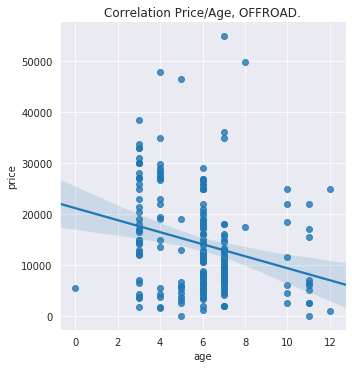

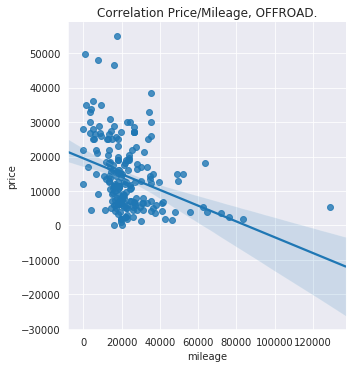

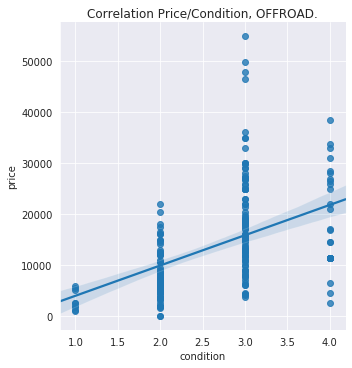

In [74]:
import seaborn as sns

sns.lmplot( x = 'age', y='price', data=offroad)
plt.title('Correlation Price/Age, OFFROAD.')
plt.show()
sns.lmplot( x = 'mileage', y='price', data=offroad)
plt.title('Correlation Price/Mileage, OFFROAD.')
plt.show()
sns.lmplot( x = 'condition', y='price', data=offroad)
plt.title('Correlation Price/Condition, OFFROAD.')
plt.show()

In the table and the three scatterplot shown we can understand correlations in the OFFROAD category dataframe. 
 - We see that age condition the price slightly down. 
 - We see that mileage condition the price slightly down.
 - We see that the condition of the vehicles is directly proportional to the price.

In [75]:
print('Pearson correlation method for OTHER type:')
print('')
display(other.corr(method='pearson'))

Pearson correlation method for OTHER type:



,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,weekday,month,year,age,mileage
price,1.000000,0.050883,0.336231,0.392091,-0.374363,0.156665,0.065859,-0.061914,0.032022,-0.053138,-0.057581,-0.141503
model_year,0.050883,1.000000,0.042759,-0.230841,-0.172135,0.036787,0.061905,-0.053784,0.085416,-0.047777,-0.989850,0.440869
condition,0.336231,0.042759,1.000000,-0.010289,-0.230562,0.038293,0.113718,0.003571,0.106684,-0.086690,-0.054369,-0.075336
cylinders,0.392091,-0.230841,-0.010289,1.000000,0.028764,0.145595,0.018194,0.059049,0.088959,-0.171229,0.202566,-0.018084
odometer,-0.374363,-0.172135,-0.230562,0.028764,1.000000,0.077092,-0.015873,0.038669,-0.082605,0.071320,0.179366,0.591755
is_4wd,0.156665,0.036787,0.038293,0.145595,0.077092,1.000000,0.072990,0.049324,-0.089849,0.062471,-0.027275,-0.084408
days_listed,0.065859,0.061905,0.113718,0.018194,-0.015873,0.072990,1.000000,0.042693,-0.062447,0.060763,-0.052210,0.061047
weekday,-0.061914,-0.053784,0.003571,0.059049,0.038669,0.049324,0.042693,1.000000,0.026950,-0.067368,0.043287,0.012018
month,0.032022,0.085416,0.106684,0.088959,-0.082605,-0.089849,-0.062447,0.026950,1.000000,-0.807984,-0.198929,0.119663
year,-0.053138,-0.047777,-0.086690,-0.171229,0.071320,0.062471,0.060763,-0.067368,-0.807984,1.000000,0.189249,-0.111924


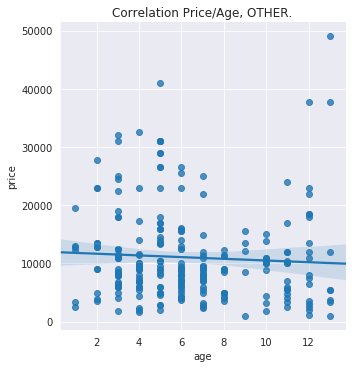

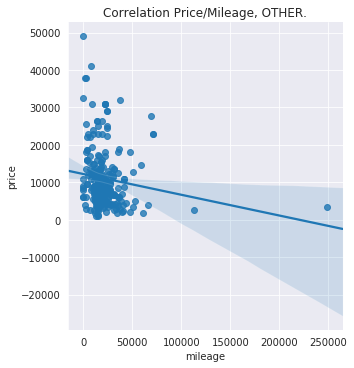

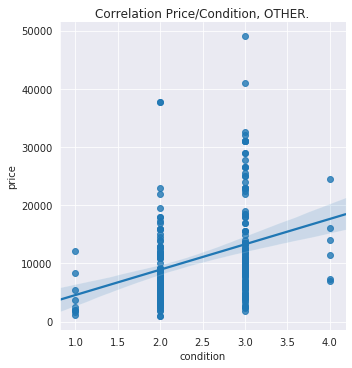

In [76]:
import seaborn as sns

sns.lmplot( x = 'age', y='price', data=other)
plt.title('Correlation Price/Age, OTHER.')
plt.show()
sns.lmplot( x = 'mileage', y='price', data=other)
plt.title('Correlation Price/Mileage, OTHER.')
plt.show()
sns.lmplot( x = 'condition', y='price', data=other)
plt.title('Correlation Price/Condition, OTHER.')
plt.show()

In the table and the three scatterplot shown we can understand correlations in the OTHER category dataframe. 
 - We see that age lower the price slightly.
 - We see that mileage lower the price slightly.
 - We see that the condition of the vehicle is directly proportional to the price.

In [77]:
print('Pearson correlation method for PICKUP type:')
print('')
display(pickup.corr(method='pearson'))

Pearson correlation method for PICKUP type:



,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,weekday,month,year,age,mileage
price,1.000000,0.166692,0.298931,-0.024326,-0.520734,0.336827,0.004881,0.002014,-0.009999,0.007113,-0.164839,-0.185260
model_year,0.166692,1.000000,-0.059679,-0.338206,-0.321925,-0.027322,0.004940,0.002986,-0.010325,0.008774,-0.992911,0.493979
condition,0.298931,-0.059679,1.000000,0.049071,-0.190055,0.043092,0.013680,-0.014340,0.007814,-0.004794,0.058748,-0.155963
cylinders,-0.024326,-0.338206,0.049071,1.000000,0.118097,0.197767,0.009196,-0.022436,0.003512,0.001867,0.336383,-0.190260
odometer,-0.520734,-0.321925,-0.190055,0.118097,1.000000,-0.105915,-0.002208,0.002686,0.016258,-0.008715,0.318942,0.401570
is_4wd,0.336827,-0.027322,0.043092,0.197767,-0.105915,1.000000,-0.003119,0.002641,0.023101,-0.020831,0.024680,-0.079259
days_listed,0.004881,0.004940,0.013680,0.009196,-0.002208,-0.003119,1.000000,-0.004962,-0.031162,0.040147,-0.000139,-0.001239
weekday,0.002014,0.002986,-0.014340,-0.022436,0.002686,0.002641,-0.004962,1.000000,-0.002724,-0.006661,-0.003759,-0.001258
month,-0.009999,-0.010325,0.007814,0.003512,0.016258,0.023101,-0.031162,-0.002724,1.000000,-0.818874,-0.087071,0.082775
year,0.007113,0.008774,-0.004794,0.001867,-0.008715,-0.020831,0.040147,-0.006661,-0.818874,1.000000,0.110143,-0.104444


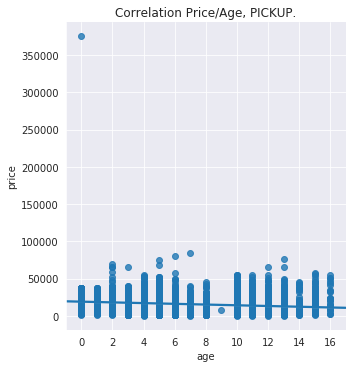

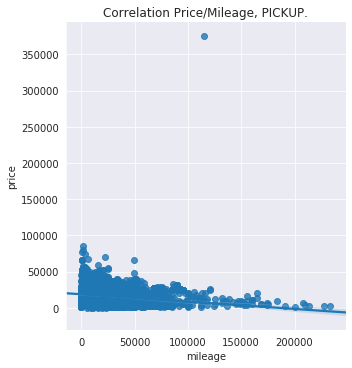

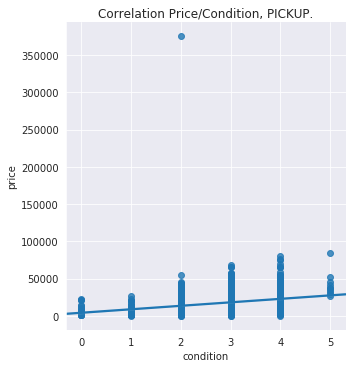

In [78]:
import seaborn as sns

sns.lmplot( x = 'age', y='price', data=pickup)
plt.title('Correlation Price/Age, PICKUP.')
plt.show()
sns.lmplot( x = 'mileage', y='price', data=pickup)
plt.title('Correlation Price/Mileage, PICKUP.')
plt.show()
sns.lmplot( x = 'condition', y='price', data=pickup)
plt.title('Correlation Price/Condition, PICKUP.')
plt.show()

In the table and the three scatterplot shown we can understand correlations in the PICKUP category dataframe. 
 - We see that age condition the price very strongly down. 
 - We see that mileage has a really uniform concetration, so the line is almost straight
 - We see that the condition of the vehicles higher slightly the price. 

In [79]:
print('Pearson correlation method for SEDAN type:')
print('')
display(sedan.corr(method='pearson'))

Pearson correlation method for SEDAN type:



,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,weekday,month,year,age,mileage
price,1.000000,0.096966,0.309834,0.045132,-0.509333,0.142547,0.005379,-0.007268,-0.017209,0.015247,-0.093593,-0.245861
model_year,0.096966,1.000000,0.042440,-0.166392,-0.245754,-0.009690,-0.010394,0.006264,0.002548,-0.006343,-0.989196,0.513589
condition,0.309834,0.042440,1.000000,-0.038146,-0.286175,0.014887,-0.009587,-0.005451,-0.009514,0.014390,-0.039832,-0.127726
cylinders,0.045132,-0.166392,-0.038146,1.000000,0.058336,0.195670,0.008857,-0.002464,-0.007623,0.009276,0.165800,-0.087895
odometer,-0.509333,-0.245754,-0.286175,0.058336,1.000000,-0.046536,0.000220,-0.004152,0.011080,-0.007255,0.241807,0.366218
is_4wd,0.142547,-0.009690,0.014887,0.195670,-0.046536,1.000000,0.005267,-0.018255,0.006440,-0.002545,0.009203,-0.061586
days_listed,0.005379,-0.010394,-0.009587,0.008857,0.000220,0.005267,1.000000,0.012611,-0.007945,0.013038,0.012183,-0.005019
weekday,-0.007268,0.006264,-0.005451,-0.002464,-0.004152,-0.018255,0.012611,1.000000,0.003553,-0.005735,-0.007031,-0.000607
month,-0.017209,0.002548,-0.009514,-0.007623,0.011080,0.006440,-0.007945,0.003553,1.000000,-0.818424,-0.122503,0.121769
year,0.015247,-0.006343,0.014390,0.009276,-0.007255,-0.002545,0.013038,-0.005735,-0.818424,1.000000,0.152872,-0.139084


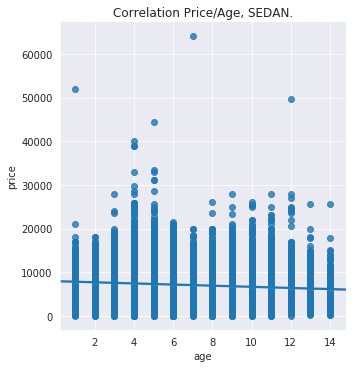

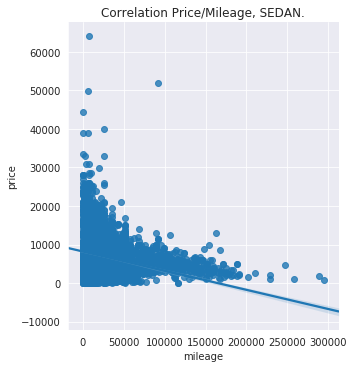

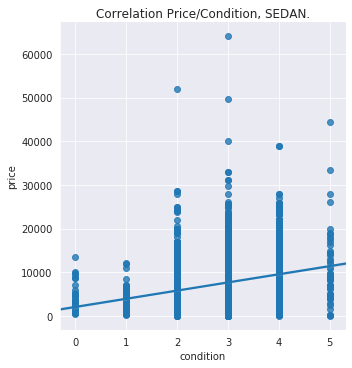

In [80]:
import seaborn as sns

sns.lmplot( x = 'age', y='price', data=sedan)
plt.title('Correlation Price/Age, SEDAN.')
plt.show()
sns.lmplot( x = 'mileage', y='price', data=sedan)
plt.title('Correlation Price/Mileage, SEDAN.')
plt.show()
sns.lmplot( x = 'condition', y='price', data=sedan)
plt.title('Correlation Price/Condition, SEDAN.')
plt.show()

In the table and the three scatterplot shown we can understand correlations in the SEDAN category dataframe. 
 - We see that age is inversely proportional to the price
 - We see that mileage is inversely proportional to the price
 - We see that the condition of the vehicle is directly proportional to the price.

In [81]:
print('Pearson correlation method for TRUCK type:')
print('')
display(truck.corr(method='pearson'))

Pearson correlation method for TRUCK type:



,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,weekday,month,year,age,mileage
price,1.000000,0.007254,0.326698,0.005736,-0.434422,0.258466,0.005238,-0.002837,-0.002331,0.002142,-0.006919,-0.245891
model_year,0.007254,1.000000,-0.018672,-0.214602,-0.129493,-0.074731,0.001090,-0.012093,0.012199,-0.005358,-0.991940,0.506348
condition,0.326698,-0.018672,1.000000,-0.016972,-0.295117,0.113818,0.000987,0.005139,-0.004812,0.002566,0.018834,-0.200199
cylinders,0.005736,-0.214602,-0.016972,1.000000,0.009017,0.138094,0.003318,-0.017093,0.001083,0.006747,0.213582,-0.180222
odometer,-0.434422,-0.129493,-0.295117,0.009017,1.000000,-0.069087,0.001389,0.000698,-0.000481,0.003331,0.128783,0.548295
is_4wd,0.258466,-0.074731,0.113818,0.138094,-0.069087,1.000000,0.002543,0.004780,-0.005553,0.005036,0.074716,-0.107570
days_listed,0.005238,0.001090,0.000987,0.003318,0.001389,0.002543,1.000000,0.004037,-0.005279,0.003408,-0.000649,0.001900
weekday,-0.002837,-0.012093,0.005139,-0.017093,0.000698,0.004780,0.004037,1.000000,0.012032,-0.014096,0.010201,-0.002234
month,-0.002331,0.012199,-0.004812,0.001083,-0.000481,-0.005553,-0.005279,0.012032,1.000000,-0.816624,-0.115565,0.098522
year,0.002142,-0.005358,0.002566,0.006747,0.003331,0.005036,0.003408,-0.014096,-0.816624,1.000000,0.132018,-0.105830


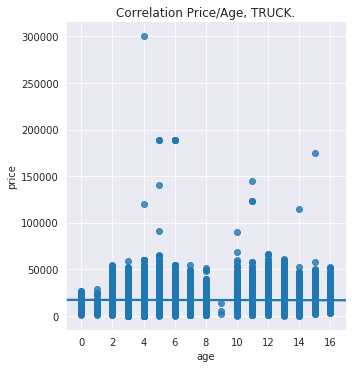

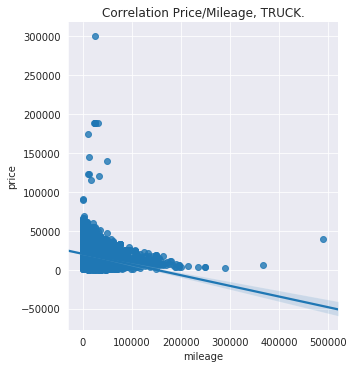

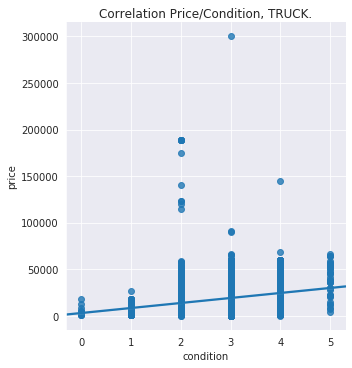

In [82]:
import seaborn as sns

sns.lmplot( x = 'age', y='price', data=truck)
plt.title('Correlation Price/Age, TRUCK.')
plt.show()
sns.lmplot( x = 'mileage', y='price', data=truck)
plt.title('Correlation Price/Mileage, TRUCK.')
plt.show()
sns.lmplot( x = 'condition', y='price', data=truck)
plt.title('Correlation Price/Condition, TRUCK.')
plt.show()

In the table and the three scatterplot shown we can understand correlations in the TRUCK category dataframe. 
 - We see that the correlation between age and price here is straight, so does not affect the price that much. 
 - We see that mileage correlation to price is inversely proportional and quite strong.
 - We see that the condition of the vehicle is directly proportional to the price.

In [83]:
print('Pearson correlation method for VAN type:')
print('')
display(van.corr(method='pearson'))

Pearson correlation method for VAN type:



,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,weekday,month,year,age,mileage
price,1.000000,0.078692,0.293397,0.085691,-0.398368,0.003400,0.072529,0.044564,0.006830,0.011745,-0.077656,-0.207859
model_year,0.078692,1.000000,-0.016164,0.206888,-0.250361,-0.244335,0.047485,-0.044688,-0.045634,0.056748,-0.995555,0.679982
condition,0.293397,-0.016164,1.000000,0.031438,-0.198265,0.110122,0.041495,0.003858,-0.004283,0.004437,0.016597,-0.165300
cylinders,0.085691,0.206888,0.031438,1.000000,-0.004093,0.159665,0.030939,-0.017160,-0.036984,0.016592,-0.205511,0.228359
odometer,-0.398368,-0.250361,-0.198265,-0.004093,1.000000,-0.038085,-0.088993,-0.004735,0.027966,-0.016024,0.249077,0.346684
is_4wd,0.003400,-0.244335,0.110122,0.159665,-0.038085,1.000000,-0.019540,0.022187,0.098392,-0.100002,0.235123,-0.170484
days_listed,0.072529,0.047485,0.041495,0.030939,-0.088993,-0.019540,1.000000,0.029449,-0.004128,0.005555,-0.047005,-0.000826
weekday,0.044564,-0.044688,0.003858,-0.017160,-0.004735,0.022187,0.029449,1.000000,-0.022822,0.054231,0.049844,-0.045928
month,0.006830,-0.045634,-0.004283,-0.036984,0.027966,0.098392,-0.004128,-0.022822,1.000000,-0.815005,-0.031205,0.137374
year,0.011745,0.056748,0.004437,0.016592,-0.016024,-0.100002,0.005555,0.054231,-0.815005,1.000000,0.037531,-0.155336


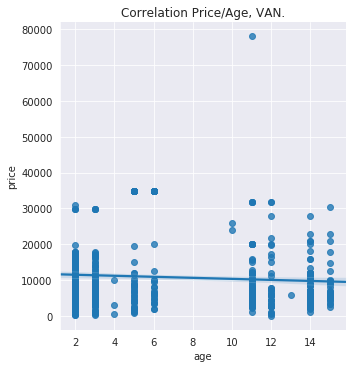

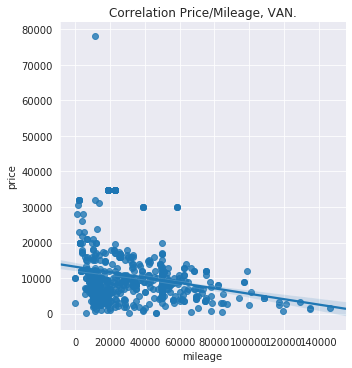

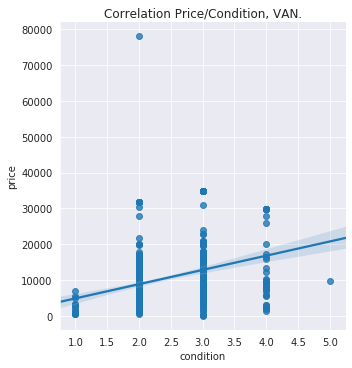

In [84]:
import seaborn as sns

sns.lmplot( x = 'age', y='price', data=van)
plt.title('Correlation Price/Age, VAN.')
plt.show()
sns.lmplot( x = 'mileage', y='price', data=van)
plt.title('Correlation Price/Mileage, VAN.')
plt.show()
sns.lmplot( x = 'condition', y='price', data=van)
plt.title('Correlation Price/Condition, VAN.')
plt.show()

In the table and the three scatterplot shown we can understand correlations in the VAN category dataframe. 
 - We see that the correlation between age and price is reversed and quite strong.
 - We see that mileage correlation to price is inversely proportional and quite strong as well.
 - We see that the condition of the vehicle is directly proportional to the price.

In [85]:
print('Pearson correlation method for WAGON type:')
print('')
display(wagon.corr(method='pearson'))

Pearson correlation method for WAGON type:



,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,weekday,month,year,age,mileage
price,1.000000,0.200744,0.299006,0.079178,-0.535886,0.243722,0.006894,0.017799,0.005555,-0.006157,-0.198148,-0.264540
model_year,0.200744,1.000000,0.100381,-0.225245,-0.256590,-0.229546,-0.010773,0.013323,0.017905,-0.015555,-0.984409,0.569717
condition,0.299006,0.100381,1.000000,-0.142098,-0.351254,0.177705,0.009775,0.021326,-0.031238,0.020965,-0.094854,-0.188272
cylinders,0.079178,-0.225245,-0.142098,1.000000,0.170834,-0.042169,0.038927,-0.006044,0.023254,-0.001598,0.220836,-0.057162
odometer,-0.535886,-0.256590,-0.351254,0.170834,1.000000,-0.104369,0.028746,0.004511,0.027698,-0.021441,0.248115,0.443342
is_4wd,0.243722,-0.229546,0.177705,-0.042169,-0.104369,1.000000,0.016757,-0.004825,0.005830,0.007606,0.226677,-0.350412
days_listed,0.006894,-0.010773,0.009775,0.038927,0.028746,0.016757,1.000000,0.012948,0.002989,-0.006565,0.009421,0.017613
weekday,0.017799,0.013323,0.021326,-0.006044,0.004511,-0.004825,0.012948,1.000000,-0.034906,0.041774,-0.005730,0.002879
month,0.005555,0.017905,-0.031238,0.023254,0.027698,0.005830,0.002989,-0.034906,1.000000,-0.828281,-0.163284,0.158008
year,-0.006157,-0.015555,0.020965,-0.001598,-0.021441,0.007606,-0.006565,0.041774,-0.828281,1.000000,0.191185,-0.180234


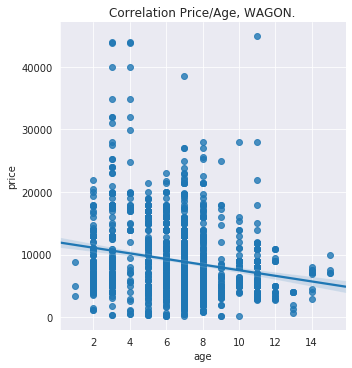

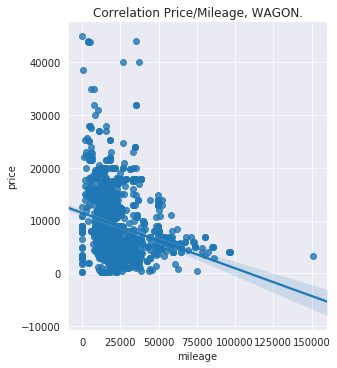

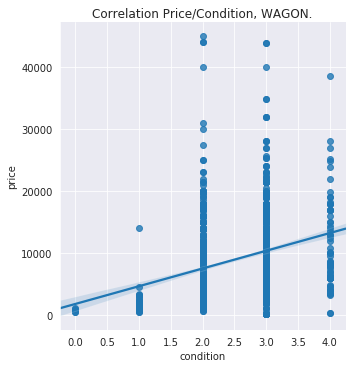

In [86]:
import seaborn as sns

sns.lmplot( x = 'age', y='price', data=wagon)
plt.title('Correlation Price/Age, WAGON.')
plt.show()
sns.lmplot( x = 'mileage', y='price', data=wagon)
plt.title('Correlation Price/Mileage, WAGON.')
plt.show()
sns.lmplot( x = 'condition', y='price', data=wagon)
plt.title('Correlation Price/Condition, WAGON.')
plt.show()

In the table and the three scatterplot shown we can understand correlations in the WAGON category dataframe. 
 - We see that age and price correlation is inversely proportional
 - We see that mileage and price correlation is inversely proportional.
 - We see that the condition of the vehicle is directly proportional to the price

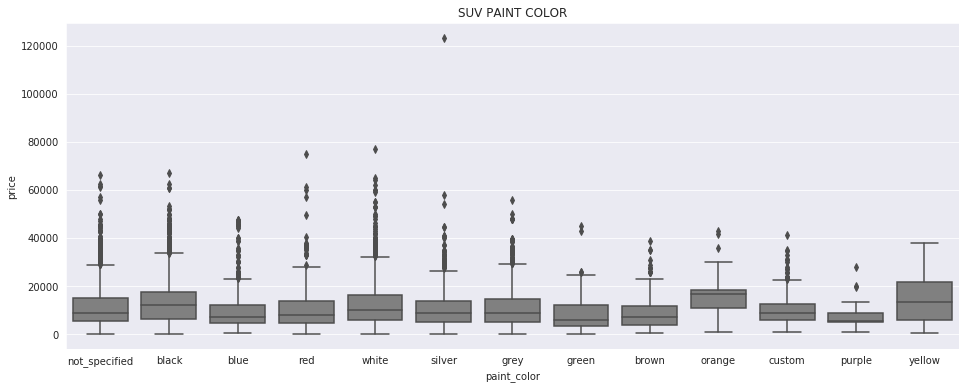

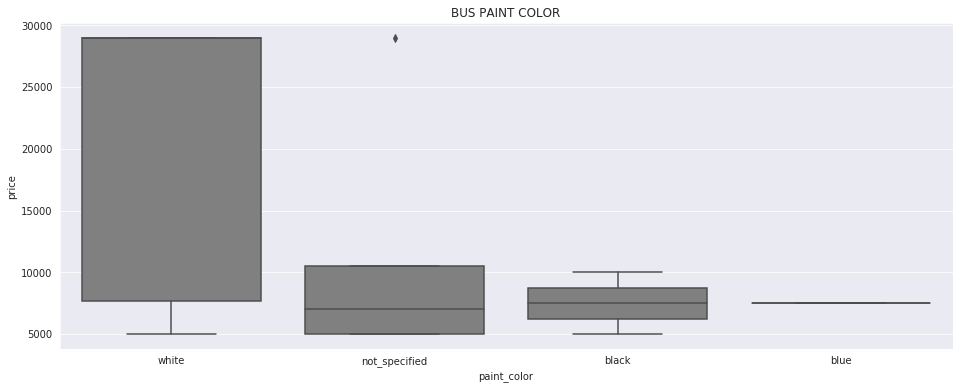

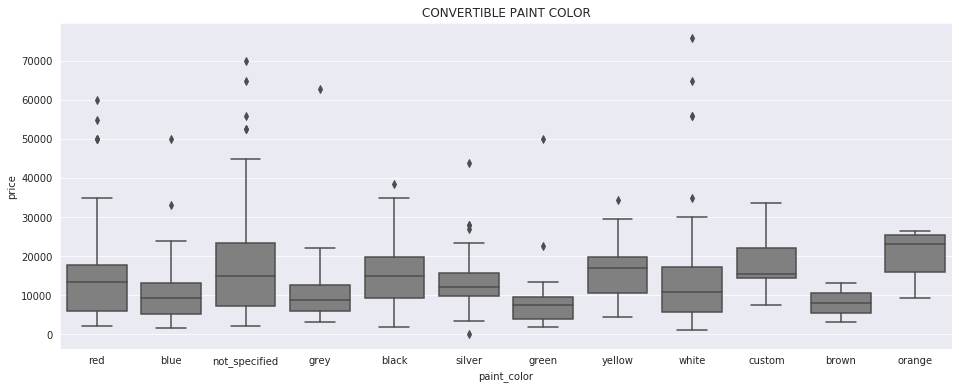

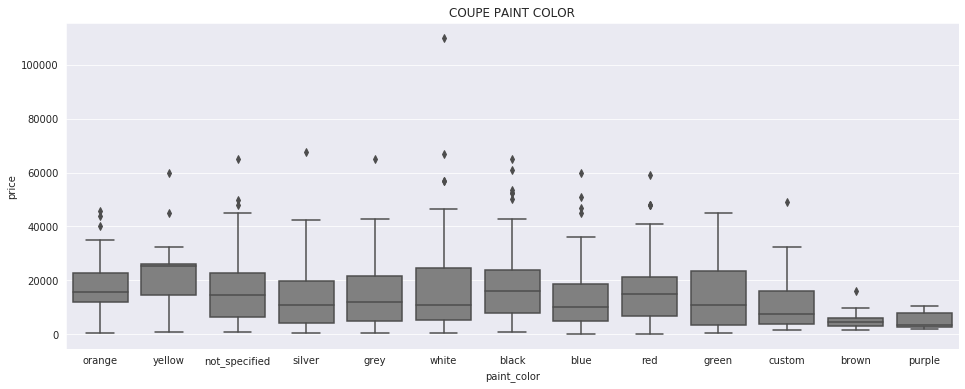

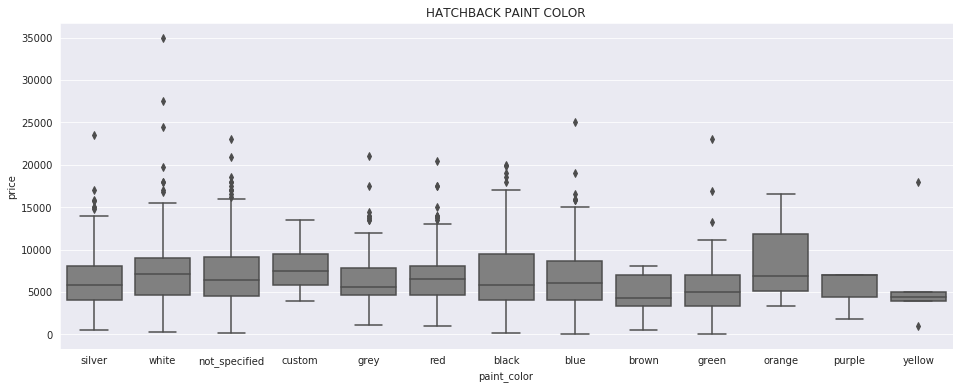

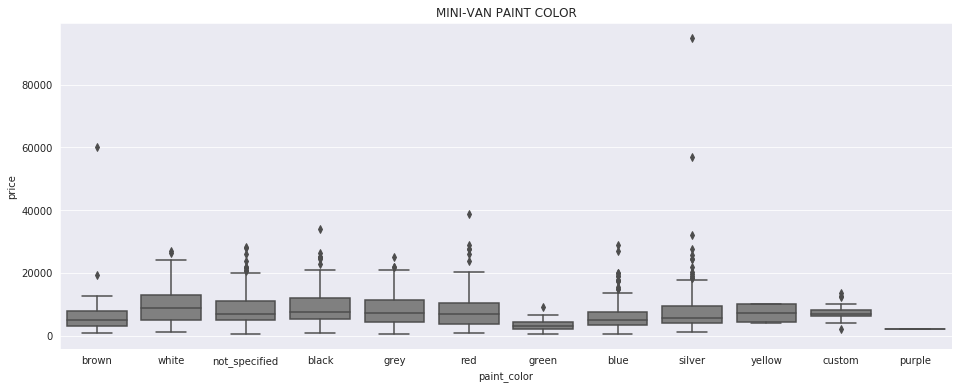

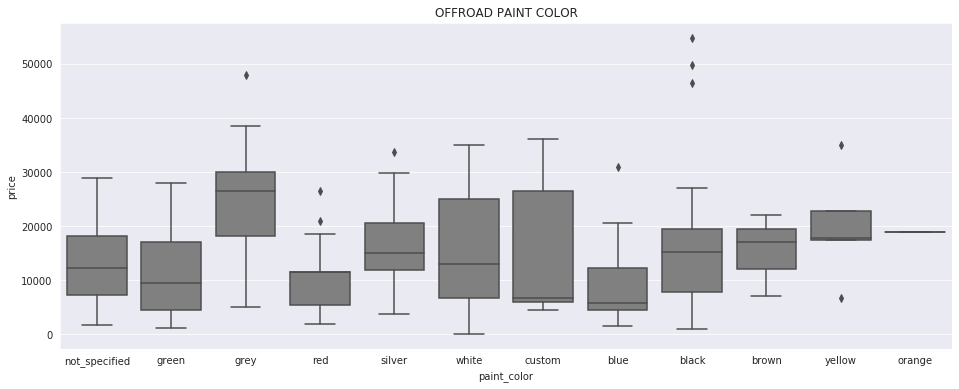

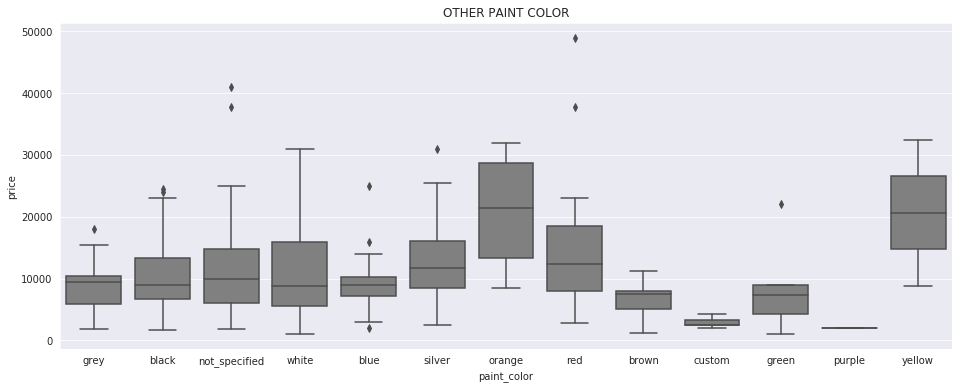

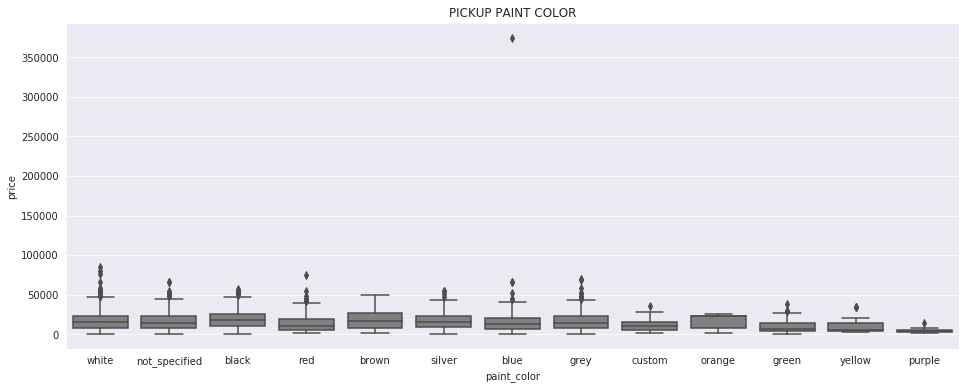

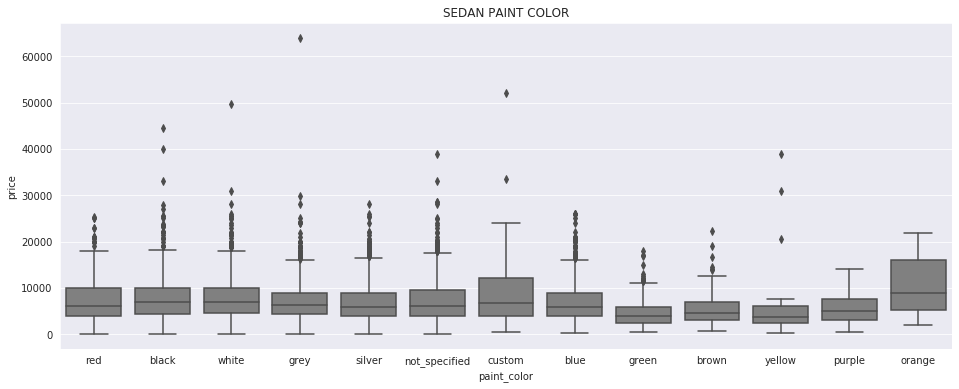

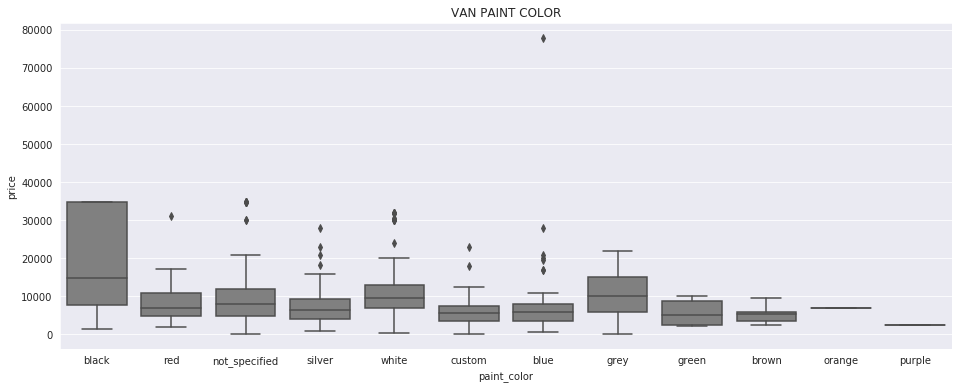

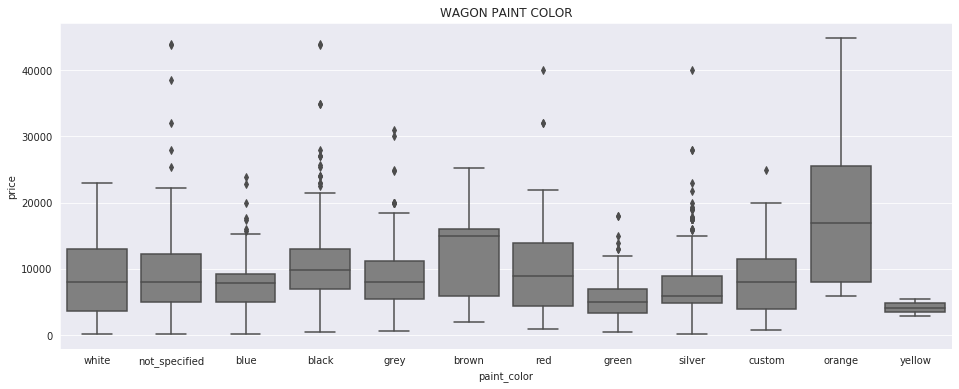

In [87]:
#Correlation btw price and paint_color.
plt.figure(figsize = (16,6))
sns.boxplot(data = suv, x = 'paint_color', y = 'price', color='Grey')
plt.title('SUV PAINT COLOR')
plt.show()
print('')
plt.figure(figsize = (16,6))
sns.boxplot(data = bus, x = 'paint_color', y = 'price', color='Grey')
plt.title('BUS PAINT COLOR')
plt.show()
print('') 
plt.figure(figsize = (16,6))
sns.boxplot(data = convertible, x = 'paint_color', y = 'price', color='Grey')
plt.title('CONVERTIBLE PAINT COLOR')
plt.show()
print('')
plt.figure(figsize = (16,6))
sns.boxplot(data = coupe, x = 'paint_color', y = 'price', color='Grey')
plt.title('COUPE PAINT COLOR')
plt.show()
print('')
plt.figure(figsize = (16,6))
sns.boxplot(data = hatchback, x = 'paint_color', y = 'price', color='Grey')
plt.title('HATCHBACK PAINT COLOR')
plt.show()
print('')
plt.figure(figsize = (16,6))
sns.boxplot(data = mini_van, x = 'paint_color', y = 'price', color='Grey')
plt.title('MINI-VAN PAINT COLOR')
plt.show()
print('')
plt.figure(figsize = (16,6))
sns.boxplot(data = offroad, x = 'paint_color', y = 'price', color='Grey')
plt.title('OFFROAD PAINT COLOR')
plt.show()
print('')
plt.figure(figsize = (16,6))
sns.boxplot(data = other, x = 'paint_color', y = 'price', color='Grey')
plt.title('OTHER PAINT COLOR')
plt.show()
print('')
plt.figure(figsize = (16,6))
sns.boxplot(data = pickup, x = 'paint_color', y = 'price', color='Grey')
plt.title('PICKUP PAINT COLOR')
plt.show()
print('')
plt.figure(figsize = (16,6))
sns.boxplot(data = sedan, x = 'paint_color', y = 'price', color='Grey')
plt.title('SEDAN PAINT COLOR')
plt.show()
print('')
plt.figure(figsize = (16,6))
sns.boxplot(data = van, x = 'paint_color', y = 'price', color='Grey')
plt.title('VAN PAINT COLOR')
plt.show()
print('')
plt.figure(figsize = (16,6))
sns.boxplot(data = wagon, x = 'paint_color', y = 'price', color='Grey')
plt.title('WAGON PAINT COLOR')
plt.show()
print('')


- Conclusions boxplots price/paint_color

Our goal was with boxplots to find correlation between price and paint color.
From the analysis of colors resulted: 
 - Suvs with higher prices are white, black, orange or yellow. range goes from 0 to 120.000.
 - Busses are mostly black, white, blues or the color is not specified. There are no other colors. range goes from 0 to 30000 
 - Convertible with higher price are black, not specified, yellow or orange. plot range goes from 0 to 70000
 - In coupe, as we can see the higher median is from yellow ones. Then following we have black and red ones. The coupes with      lower medians are purple and brown. range is from 0 to almost 120000.
 - For hatchbacks we can say that orange and costum ones have the higher median. Range till 35000
 - Mini-vans with high prices are mostly white and yellow. There are even few of them purple. Range till 95000.
 - Many offroad are white or with a costum color but white ones have an higher median compared to costum. Grey ones are not so    many as white or costum, but the median price is the highest in the serie.  Range till 600000
 - For the other category, yellow and orange are the max values. Range 0 to 50000.
 - Pickup compared to other categories have definitely lower medians. In this category we observe the higher outlier of the        dataset, this is a blue pickup, with a price of 375000 dollars.
 - In Sedan type, orange and custom are the higher values, then we have black and white ones. lower values are registered with    green and yellow ones. the range goes till 70000 and the max value is a grey one.
 - Vans with higher prices are mostly black. there are really few ads of purple and orange ones. Range till 80000.
 - In wagon the higher value is orange. We have really many ads of this color and type and the upper wishker of this color is      almost coinciding with the max value of type. For lower values, we observe here yellow ones. few ads and the lower median of    the type. Range from 0 to 50000 dollars.

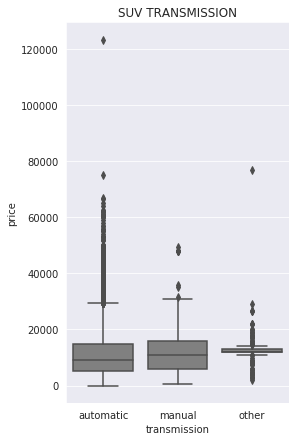

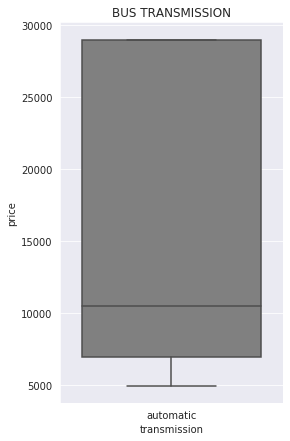

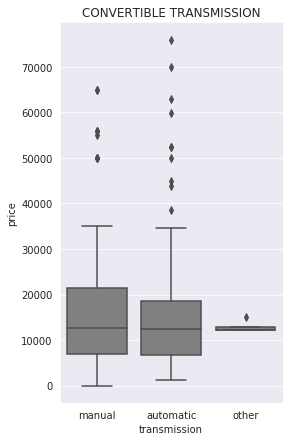

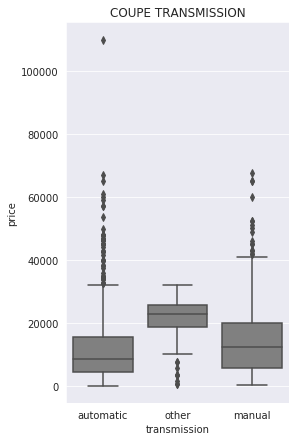

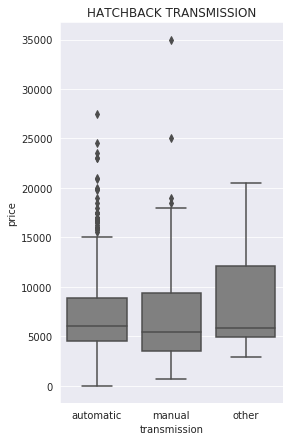

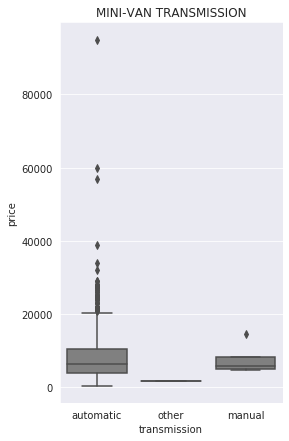

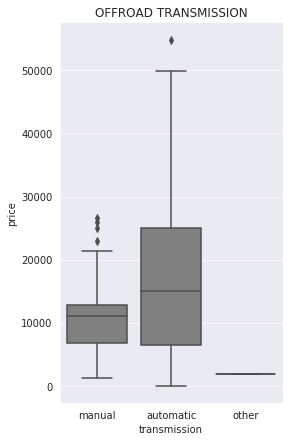

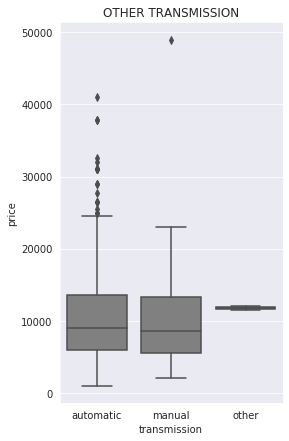

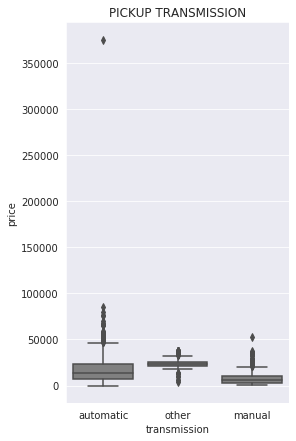

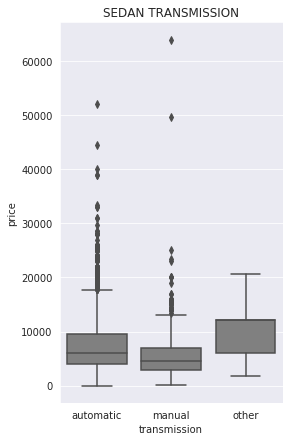

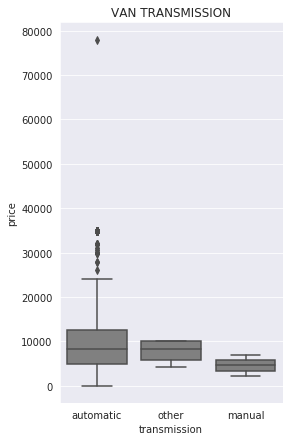

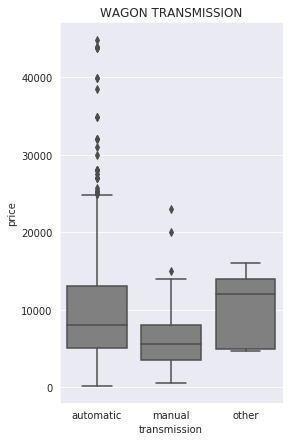

In [88]:
#Correlation btw price and transmission.
plt.figure(figsize = (4,7))
sns.boxplot(data = suv, x = 'transmission', y = 'price', color='Grey')
plt.title('SUV TRANSMISSION')
plt.show()
print('')
plt.figure(figsize = (4,7))
sns.boxplot(data = bus, x = 'transmission', y = 'price', color='Grey')
plt.title('BUS TRANSMISSION')
plt.show()
print('') 
plt.figure(figsize = (4,7))
sns.boxplot(data = convertible, x = 'transmission', y = 'price', color='Grey')
plt.title('CONVERTIBLE TRANSMISSION')
plt.show()
print('')
plt.figure(figsize = (4,7))
sns.boxplot(data = coupe, x = 'transmission', y = 'price', color='Grey')
plt.title('COUPE TRANSMISSION')
plt.show()
print('')
plt.figure(figsize = (4,7))
sns.boxplot(data = hatchback, x = 'transmission', y = 'price', color='Grey')
plt.title('HATCHBACK TRANSMISSION')
plt.show()
print('')
plt.figure(figsize = (4,7))
sns.boxplot(data = mini_van, x = 'transmission', y = 'price', color='Grey')
plt.title('MINI-VAN TRANSMISSION')
plt.show()
print('')
plt.figure(figsize = (4,7))
sns.boxplot(data = offroad, x = 'transmission', y = 'price', color='Grey')
plt.title('OFFROAD TRANSMISSION')
plt.show()
print('')
plt.figure(figsize = (4,7))
sns.boxplot(data = other, x = 'transmission', y = 'price', color='Grey')
plt.title('OTHER TRANSMISSION')
plt.show()
print('')
plt.figure(figsize = (4,7))
sns.boxplot(data = pickup, x = 'transmission', y = 'price', color='Grey')
plt.title('PICKUP TRANSMISSION')
plt.show()
print('')
plt.figure(figsize = (4,7))
sns.boxplot(data = sedan, x = 'transmission', y = 'price', color='Grey')
plt.title('SEDAN TRANSMISSION')
plt.show()
print('')
plt.figure(figsize = (4,7))
sns.boxplot(data = van, x = 'transmission', y = 'price', color='Grey')
plt.title('VAN TRANSMISSION')
plt.show()
print('')
plt.figure(figsize = (4,7))
sns.boxplot(data = wagon, x = 'transmission', y = 'price', color='Grey')
plt.title('WAGON TRANSMISSION')
plt.show()
print('')

- Conclusions boxplots price/transmission

Our goal was with boxplots to find correlation between price and trasmission
From the analysis of trasmission types resulted: 
 - Suvs are mostly manual or automatic. In automatic we can observe many outliers over the upper wishker. We have even few suvs    that has another type of trasmission, in this circumstance we observe outliers over the upper wishker but even before the      lower one. Range 0 to 12000
 - Busses have only an automatic trasmission. No other values. range 0 to 30000
 - Convertible with higher price and more ads are manual ones. The difference with automatic is not that relevant, since          outliers in automatic higher a few, the median price. We observe here even few ads with other type of trasmission.
 - In coupe, as we can see the higher median is from other type of trasmission. here the outliers we find are only before the      lower wishker. manual has an higher median compared to automatic and even a higher upper wishker. while we can observe much    more upper outliers in automatic. Range 0 to 110000.
 - For hatchbacks we can say that other has the hihgher upper wishker of the vehicle type. While automatic has the first lower    wishker and even the higher median (this is dependent from outliers). Range till 35000, max value observed in manual.
 - Mini-vans with high prices are mostly automatic. There are even few of them with another type of trasmission. The type range    goes from 0 till 95000 and we observe many outliers in automatic trasmission type.
 - Many offroad has automatic trasmission. here we observe the higher median and upper wishker, and from the boxplot is            possible to understand that the majority of values for the type are automatic. are present even few ads with other type.        Range till 600000.
 - For the other category, we observe the higher median in other and automatic and manual has almost the same values, in          automatic we observe the majority of outliers, while the max value is in manual.
 - Pickup with higher median price are observed in other, where we can find, upper and even lower outliers. the lower prices      here are with manual trasmission and the max values is an automatic one. (375000, even max value of dataset)
 - In Sedan type, the bigger plot has "other" type of trasmission. Here I couldn't understand why I cannot find the median.
   outliers are more for automatic transmission type.
 - Vans with higher prices are mostly automatic. Range till 80000.
 - In wagon the higher median is observed for other type of trasmission. while outliers are only found in automatic.              Range from 0 to 50000 dollars.

# Step 5. Overall conclusion
DATABASE MANAGING AND ORGANIZATION.
Our goal was to manage and organize a database for Crankshaft List site of vehicles buying and selling.
The data we had in our hands were almost precise, without many mistakes but there were in there, missing randomic values and 
non-randomic values, furthermore we had to find day, month and year the advertisement was placed. To fill those missing values, I used in some cases, median and mean where was possible. And for year I used a dictionary based on our general data grouped by model of vehicle. 

EXPLORATORY DATA ANALYSIS.
I studied in this section the correlation among price related to age, mileage, condition, cylinders, days listed. 
For each of this columns plotted the general histogram, then finding the right range I was able to redefine histograms and let them being much more clear and understandable.

Furthermore, I determined and removed outliers from the histograms and compared the new histograms with the old ones.

I was able to describe the tipical life time of ads on the site, wich goes from 2 days to 104 days. With a mean and a median near by 30 and 40 days.

I analized as well the number of ads for each vehicle type and found the two types that had more ads count: SUV and TRUCK.
The tasks required to find correlation for suv and truck type with other variables such as: ge, mileage, condition, transmission type, and color. However, I decided to carry out this exploration on every type of vehicle. I used in this kind of analysi scatter-plot, box-plot and found outliers whiskers. 

From this analysi I am able to confirm my hypothesis, they were: 
1) Price has a direct proporsional relation with condition
2) Price has an inversal proporsional relation compared with age (not for convertible cause "vintage") and mileage.



### Project completion checklist

Mark the completed tasks with 'x'. Then press Shift+Enter.

- [x]  file opened
- [x]  files explored (first rows printed, info() method)
- [x]  missing values determined
- [x]  missing values filled in
- [x]  clarification of the discovered missing values provided
- [x]  data types converted
- [x]  explanation of which columns had the data types changed and why
- [x]  calculated and added to the table: day of the week, month, and year the ad was placed
- [x]  calculated and added to the table: the vehicle's age (in years) when the ad was placed
- [x]  calculated and added to the table: the vehicle's average mileage per year
- [x]  the following parameters investigated: price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition
- [x]  histograms for each parameter created
- [x]  task completed: "Determine the upper limits of outliers, remove the outliers and store them in a separate DataFrame, and continue your work with the filtered data."
- [x]  task completed: "Use the filtered data to plot new histograms. Compare them with the earlier histograms (the ones that included outliers). Draw conclusions for each histogram."
- [x]  task completed: "Study how many days advertisements were displayed (days_listed). Plot a histogram. Calculate the mean and median. Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time.  "
- [x]  task completed: "Analyze the number of ads and the average price for each type of vehicle. Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads. "
- [x]  task completed: "What factors impact the price most? Take each of the popular types you detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.  "
- [x]  each stage has a conclusion
- [x]  overall conclusion drawn